In [ ]:
import matplotlib.pyplot as plt

data = {
    1: [1, 2, 3],
    2: [1, 2, 3],
    3: [1, 2, 3],
}

plt.figure(figsize=(10, 6))
for x, y_values in data.items():
    for y in y_values:
        plt.scatter(x, y)
        plt.text(x, y, str(y))
plt.legend()
plt.show()

In [ ]:
import pandas as pd

# Load the data
df = pd.read_csv('Alaska_04102020_PRESIDENTOFTHEUNITEDSTATES.csv')

# Display the first few rows
df.head()

In [ ]:
# Concatenate the ranking columns to create a new column 'permutation'
df['permutation'] = df[['rank1', 'rank2', 'rank3', 'rank4', 'rank5']].apply(lambda row: ' > '.join(row.values.astype(str)), axis=1)

# Count the frequency of each permutation and sort them in descending order
permutation_counts = df['permutation'].value_counts()

# Count and plot the top 10 most frequent permutations
permutation_counts.head(10).plot.barh()

In [ ]:
import numpy as np

def generate_ballot(permutations, probabilities, n_samples=1):
    """Generate n_samples ballots based on given permutations and their probabilities."""
    # Normalize probabilities
    probabilities = probabilities / probabilities.sum()
    
    # Draw samples
    samples = np.random.choice(permutations, size=n_samples, p=probabilities)
    
    return samples

# Let's generate 5 random ballots as an example
generate_ballot(permutation_counts.index, permutation_counts.values, n_samples=5)

In [ ]:
# Generate 10000 ballots for a meaningful visualization
generated_ballots = pd.Series(generate_ballot(permutation_counts.index, permutation_counts.values, n_samples=10000))

# Count the frequency of each generated ballot
generated_ballot_counts = generated_ballots.value_counts()

# Plot the top 10 most frequent generated ballots
top_10_generated = generated_ballot_counts.head(10)
top_10_generated.plot(kind='barh')
plt.xlabel('Frequency')
plt.ylabel('Generated Ballot')
plt.title('Top 10 most frequent generated ballots')
plt.show()

In [ ]:
# Extract unique candidates from each ranking column
unique_candidates = pd.unique(df[['rank1', 'rank2', 'rank3', 'rank4', 'rank5']].values.ravel('K'))

# Display the unique candidates
unique_candidates

In [ ]:
from collections import Counter
import itertools

# Create a list of ranking columns
ranking_columns = ['rank1', 'rank2', 'rank3', 'rank4', 'rank5']

# Initialize a counter to store the counts of each pair
pairwise_counts = Counter()

# Loop over each pair of adjacent ranking columns
for i in range(len(ranking_columns)-1):
    col1 = ranking_columns[i]
    col2 = ranking_columns[i+1]
    # Extract the pairs from the two columns
    pairs = df[[col1, col2]].values.tolist()
    
    # Convert each pair to a tuple and count the occurrences
    pairwise_counts.update(tuple(pair) for pair in pairs if 'skipped' not in pair)

# Convert the counter to a list of tuples and then to a DataFrame for easier analysis
pairwise_counts_list = list(pairwise_counts.items())
pairwise_counts_df = pd.DataFrame(pairwise_counts_list, columns=['Pair', 'Count'])

# Sort the DataFrame by count in descending order
pairwise_counts_df.sort_values('Count', ascending=False, inplace=True)

# Reset the index of the DataFrame
pairwise_counts_df.reset_index(drop=True, inplace=True)

# Display the most common pairs
pairwise_counts_df.head()

In [ ]:
import matplotlib.pyplot as plt

# Filter the DataFrame to include only pairs with Biden and Sanders
biden_sanders_df = pairwise_counts_df[pairwise_counts_df['Pair'].apply(lambda pair: set(pair) == {'Joseph R. Biden', 'Bernie Sanders'})]

# Sort the DataFrame so that pairs with Biden first are on the left and pairs with Sanders first are on the right
biden_sanders_df = biden_sanders_df.sort_values('Pair', ascending=False, key=lambda pair: pair.str[0])

# Create a horizontal bar plot
plt.figure(figsize=(10, 5))
plt.barh(biden_sanders_df['Pair'].apply(lambda pair: ' > '.join(pair)), biden_sanders_df['Count'], color=['blue', 'red'])
plt.xlabel('Count')
plt.ylabel('Pair')
plt.title('Pairwise Permutations of Biden and Sanders')
plt.show()

In [ ]:
# Sort the DataFrame by count in descending order for better visualization
pairwise_counts_df_sorted = pairwise_counts_df.sort_values('Count', ascending=True)

# Plot
plt.figure(figsize=(10, 20))
plt.barh(pairwise_counts_df_sorted['Pair'].apply(lambda pair: ' > '.join(pair)), pairwise_counts_df_sorted['Count'])
plt.xlabel('Count')
plt.ylabel('Pair')
plt.title('Pairwise Permutations of Candidates')
plt.show()

In [ ]:
# Create a subset of the data that contains the most common pair
most_common_pair = ('Joseph R. Biden', 'Bernie Sanders')
subset_df = df[df.apply(lambda row: most_common_pair in [tuple(row[ranking_columns[i:i+2]]) for i in range(len(ranking_columns)-1)], axis=1)]

# Display the first few rows
subset_df.head()

In [ ]:
# Initialize a counter to store the counts of each pair
subset_pairwise_counts = Counter()

# Loop over each pair of adjacent ranking columns
for i in range(len(ranking_columns)-1):
    col1 = ranking_columns[i]
    col2 = ranking_columns[i+1]
    # Extract the pairs from the two columns
    pairs = subset_df[[col1, col2]].values.tolist()
    
    # Convert each pair to a tuple and count the occurrences
    subset_pairwise_counts.update(tuple(pair) for pair in pairs if 'skipped' not in pair)

# Convert the counter to a list of tuples and then to a DataFrame for easier analysis
subset_pairwise_counts_list = list(subset_pairwise_counts.items())
subset_pairwise_counts_df = pd.DataFrame(subset_pairwise_counts_list, columns=['Pair', 'Count'])

# Sort the DataFrame by count in descending order
subset_pairwise_counts_df.sort_values('Count', ascending=False, inplace=True)

# Reset the index of the DataFrame
subset_pairwise_counts_df.reset_index(drop=True, inplace=True)

# Display the most common pairs
subset_pairwise_counts_df.head()

In [ ]:
# Sort the DataFrame by count in descending order for better visualization
subset_pairwise_counts_df_sorted = subset_pairwise_counts_df.sort_values('Count', ascending=True)

# Plot
plt.figure(figsize=(10, 20))
plt.barh(subset_pairwise_counts_df_sorted['Pair'].apply(lambda pair: ' > '.join(pair)), subset_pairwise_counts_df_sorted['Count'])
plt.xlabel('Count')
plt.ylabel('Pair')
plt.title('Pairwise Permutations of Candidates in Subset')
plt.show()

In [ ]:
permuation_frequency = {}
for col in ranking_columns:
    permuation_frequency[col] = df[col].value_counts()

print(permuation_frequency)

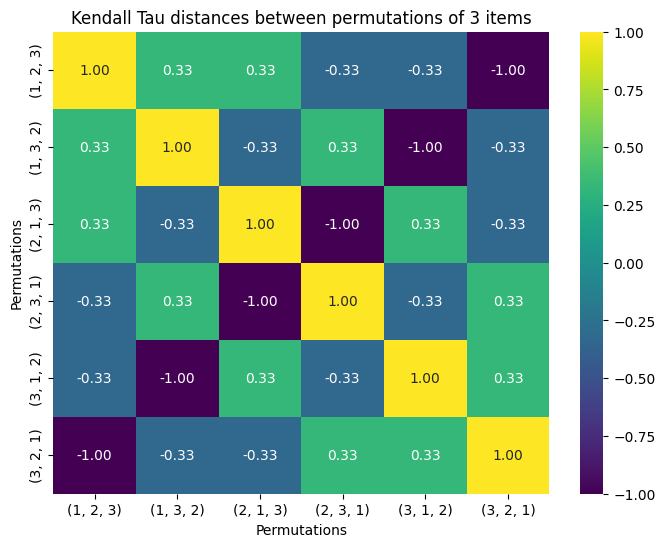

In [4]:
import seaborn as sns

import itertools
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt

# Generate all permutations of 3 items
items = [1, 2, 3]
permutations = list(itertools.permutations(items))

# Initialize the distance matrix
dist_matrix = np.zeros((len(permutations), len(permutations)))

# Calculate Kendall Tau distances
for i in range(len(permutations)):
    for j in range(len(permutations)):
        tau, _ = scipy.stats.kendalltau(permutations[i], permutations[j])
        dist_matrix[i, j] = tau

# Create a heatmap of the Kendall Tau distance matrix
plt.figure(figsize=(8, 6))
sns.heatmap(dist_matrix, annot=True, fmt=".2f", cmap='viridis', xticklabels=permutations, yticklabels=permutations)

plt.title('Kendall Tau distances between permutations of 3 items')
plt.xlabel('Permutations')
plt.ylabel('Permutations')
plt.show()

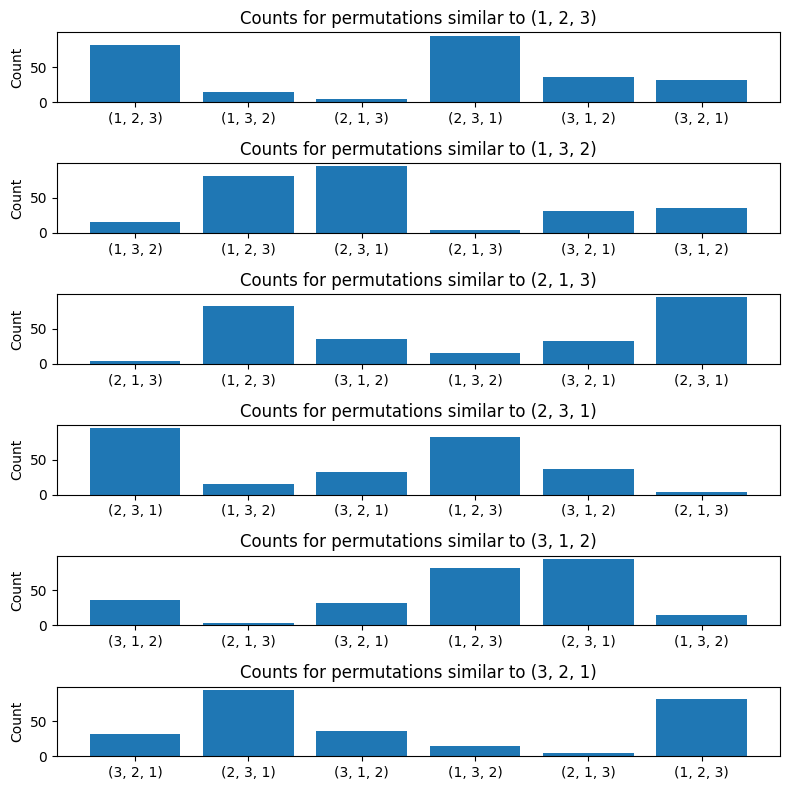

In [5]:
import itertools
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Generate all permutations of 3 items
items = [1, 2, 3]
permutations = list(itertools.permutations(items))

# Initialize the distance matrix
dist_matrix = np.zeros((len(permutations), len(permutations)))

# Calculate Kendall Tau distances
for i in range(len(permutations)):
    for j in range(len(permutations)):
        tau, _ = scipy.stats.kendalltau(permutations[i], permutations[j])
        dist_matrix[i, j] = tau

# Randomize counts for each permutation
random.seed(42)
counts = [random.randint(1, 100) for _ in range(len(permutations))]

# Create individual bar plots for each permutation
fig, axes = plt.subplots(nrows=len(permutations), figsize=(8, 8))

for i, perm in enumerate(permutations):

    # Get the Kendall Tau distances from the current permutation to all other permutations
    distances = dist_matrix[i]
    
    # Create an array of permutations, distances, and counts, and sort it by distance
    perm_distances_counts = sorted(zip(permutations, distances, counts), key=lambda x: x[1], reverse=True)
    
    # Plot the counts
    axes[i].bar([str(p) for p, d, c in perm_distances_counts], [c for p, d, c in perm_distances_counts])
    axes[i].set_title(f'Counts for permutations similar to {perm}')
    axes[i].set_ylabel('Count')

plt.tight_layout()
plt.show()

In [6]:
import pandas as pd

# Load the data
election = pd.read_csv('Alaska_11082022_USRepresentative.csv')

# Ignored options
ignore = ['skipped', 'Undeclared', 'overvote', 'Write-in']

# Get the unique candidates without the 'skipped', 'Undeclared', and 'overvote' options
candidates = pd.unique(election[['rank1', 'rank2', 'rank3', 'rank4', 'rank5']].values.ravel('K'))
candidates = [c for c in candidates if c not in ignore]

candidates

['Peltola, Mary S.', 'Bye, Chris', 'Palin, Sarah', 'Begich, Nick']

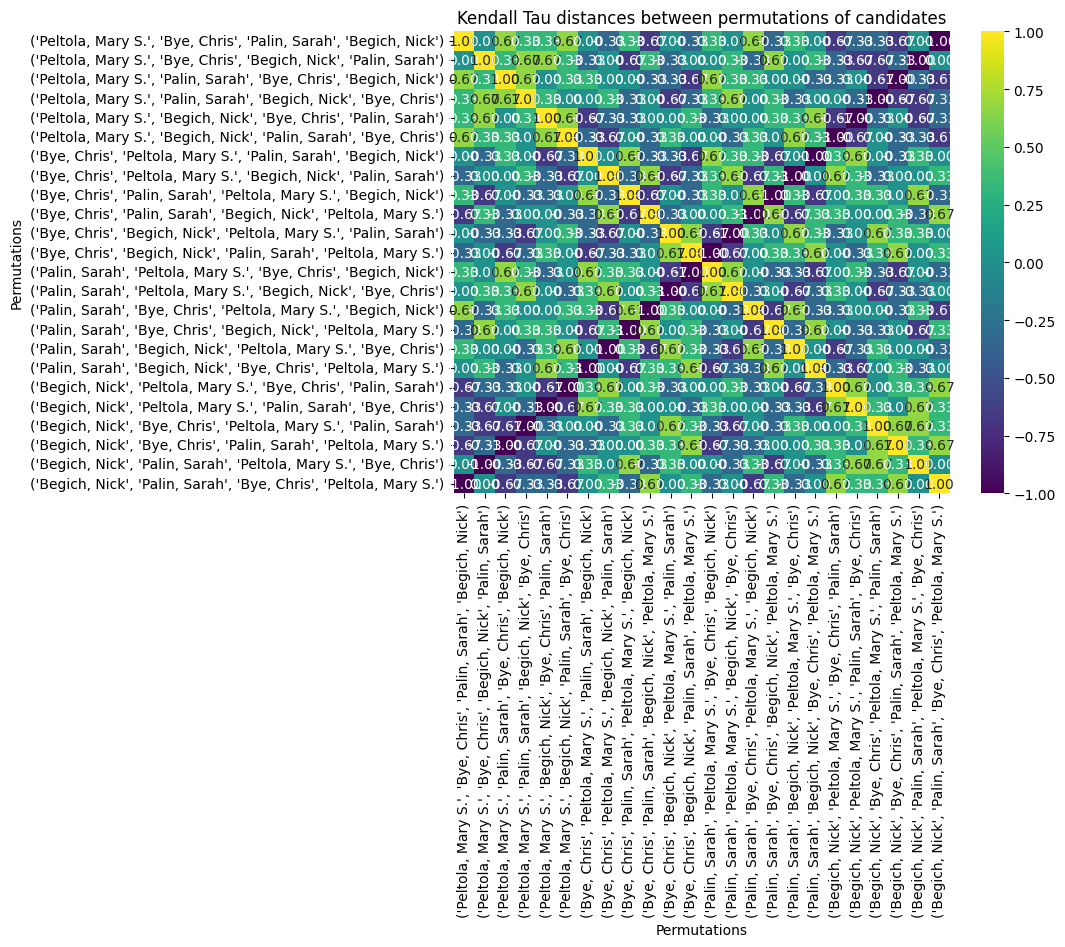

In [7]:
# Get permutations of all candidates
permutations = list(itertools.permutations(candidates))

# Generate distance matrix for all permutations
dist_matrix = np.zeros((len(permutations), len(permutations)))

# Calculate Kendall Tau distances
for i in range(len(permutations)):
    for j in range(len(permutations)):
        tau, _ = scipy.stats.kendalltau(permutations[i], permutations[j])
        dist_matrix[i, j] = tau

# Create a heatmap of the Kendall Tau distance matrix
plt.figure(figsize=(8, 6))
sns.heatmap(dist_matrix, annot=True, fmt=".2f", cmap='viridis', xticklabels=permutations, yticklabels=permutations)

plt.title('Kendall Tau distances between permutations of candidates')
plt.xlabel('Permutations')
plt.ylabel('Permutations')
plt.show()

In [8]:
# Create a permutation count dictionary from permutations
permutation_counts = {p: 0 for p in permutations}

# Sort the permutation counts in alphabetical order
permutation_counts = dict(sorted(permutation_counts.items(), key=lambda x: x[0]))

# Display the first few items
for i, (k, v) in enumerate(permutation_counts.items()):
    print(k, v)
    if i == 10:
        break

('Begich, Nick', 'Bye, Chris', 'Palin, Sarah', 'Peltola, Mary S.') 0
('Begich, Nick', 'Bye, Chris', 'Peltola, Mary S.', 'Palin, Sarah') 0
('Begich, Nick', 'Palin, Sarah', 'Bye, Chris', 'Peltola, Mary S.') 0
('Begich, Nick', 'Palin, Sarah', 'Peltola, Mary S.', 'Bye, Chris') 0
('Begich, Nick', 'Peltola, Mary S.', 'Bye, Chris', 'Palin, Sarah') 0
('Begich, Nick', 'Peltola, Mary S.', 'Palin, Sarah', 'Bye, Chris') 0
('Bye, Chris', 'Begich, Nick', 'Palin, Sarah', 'Peltola, Mary S.') 0
('Bye, Chris', 'Begich, Nick', 'Peltola, Mary S.', 'Palin, Sarah') 0
('Bye, Chris', 'Palin, Sarah', 'Begich, Nick', 'Peltola, Mary S.') 0
('Bye, Chris', 'Palin, Sarah', 'Peltola, Mary S.', 'Begich, Nick') 0
('Bye, Chris', 'Peltola, Mary S.', 'Begich, Nick', 'Palin, Sarah') 0


In [11]:
# Helper function to generate all prefixes of a sequence
def prefixes(seq):
    for length in range(1, len(seq) + 1):
        yield seq[:length]

# Create a dictionary to store the matches
partial_matching = {}

# For each full permutation
for perm in permutations:
    # Generate all prefixes (partial permutations)
    for prefix in prefixes(perm):
        # If the prefix is not yet a key in the dictionary, add it
        if prefix not in partial_matching:
            partial_matching[prefix] = []
        # Add the full permutation to the list of matches for this prefix
        partial_matching[prefix].append(perm)

# Display the first few items
for i, (k, v) in enumerate(partial_matching.items()):
    print(k)
    for perm in v:
        print('  ', perm)
    if i == 10:
        break

('Peltola, Mary S.',)
   ('Peltola, Mary S.', 'Bye, Chris', 'Palin, Sarah', 'Begich, Nick')
   ('Peltola, Mary S.', 'Bye, Chris', 'Begich, Nick', 'Palin, Sarah')
   ('Peltola, Mary S.', 'Palin, Sarah', 'Bye, Chris', 'Begich, Nick')
   ('Peltola, Mary S.', 'Palin, Sarah', 'Begich, Nick', 'Bye, Chris')
   ('Peltola, Mary S.', 'Begich, Nick', 'Bye, Chris', 'Palin, Sarah')
   ('Peltola, Mary S.', 'Begich, Nick', 'Palin, Sarah', 'Bye, Chris')
('Peltola, Mary S.', 'Bye, Chris')
   ('Peltola, Mary S.', 'Bye, Chris', 'Palin, Sarah', 'Begich, Nick')
   ('Peltola, Mary S.', 'Bye, Chris', 'Begich, Nick', 'Palin, Sarah')
('Peltola, Mary S.', 'Bye, Chris', 'Palin, Sarah')
   ('Peltola, Mary S.', 'Bye, Chris', 'Palin, Sarah', 'Begich, Nick')
('Peltola, Mary S.', 'Bye, Chris', 'Palin, Sarah', 'Begich, Nick')
   ('Peltola, Mary S.', 'Bye, Chris', 'Palin, Sarah', 'Begich, Nick')
('Peltola, Mary S.', 'Bye, Chris', 'Begich, Nick')
   ('Peltola, Mary S.', 'Bye, Chris', 'Begich, Nick', 'Palin, Sarah')
('Pe

In [12]:
# Count the frequency of each permutation in the election
for _, row in election.iterrows():
    if 'skipped' not in row.values:
        permutation = tuple(row[['rank1', 'rank2', 'rank3', 'rank4', 'rank5']].values)

        # Collapse the permutation and ignore the ignored options
        permutation = tuple([p for p in permutation if p not in ignore])
        
        # Check the number of matching permutations in permutation counts, including partial matchings
        for i in range(1, len(permutation)+1):
            for subset in itertools.combinations(permutation, i):
                if subset in partial_matching:
                    for matching_permutation in partial_matching[subset]:
                        permutation_counts[matching_permutation] += 1


# Sort the permutation counts in descending order
permutation_counts = dict(sorted(permutation_counts.items(), key=lambda x: x[1], reverse=True))

# Display the first few items
for i, (k, v) in enumerate(permutation_counts.items()):
    print(k, v)
    if i == 10:
        break

('Peltola, Mary S.', 'Bye, Chris', 'Begich, Nick', 'Palin, Sarah') 9046
('Peltola, Mary S.', 'Bye, Chris', 'Palin, Sarah', 'Begich, Nick') 8810
('Peltola, Mary S.', 'Begich, Nick', 'Palin, Sarah', 'Bye, Chris') 8643
('Peltola, Mary S.', 'Begich, Nick', 'Bye, Chris', 'Palin, Sarah') 8283
('Palin, Sarah', 'Begich, Nick', 'Bye, Chris', 'Peltola, Mary S.') 7570
('Palin, Sarah', 'Begich, Nick', 'Peltola, Mary S.', 'Bye, Chris') 7364
('Begich, Nick', 'Palin, Sarah', 'Bye, Chris', 'Peltola, Mary S.') 7346
('Palin, Sarah', 'Bye, Chris', 'Peltola, Mary S.', 'Begich, Nick') 7214
('Peltola, Mary S.', 'Palin, Sarah', 'Begich, Nick', 'Bye, Chris') 7201
('Begich, Nick', 'Palin, Sarah', 'Peltola, Mary S.', 'Bye, Chris') 7176
('Peltola, Mary S.', 'Palin, Sarah', 'Bye, Chris', 'Begich, Nick') 7141


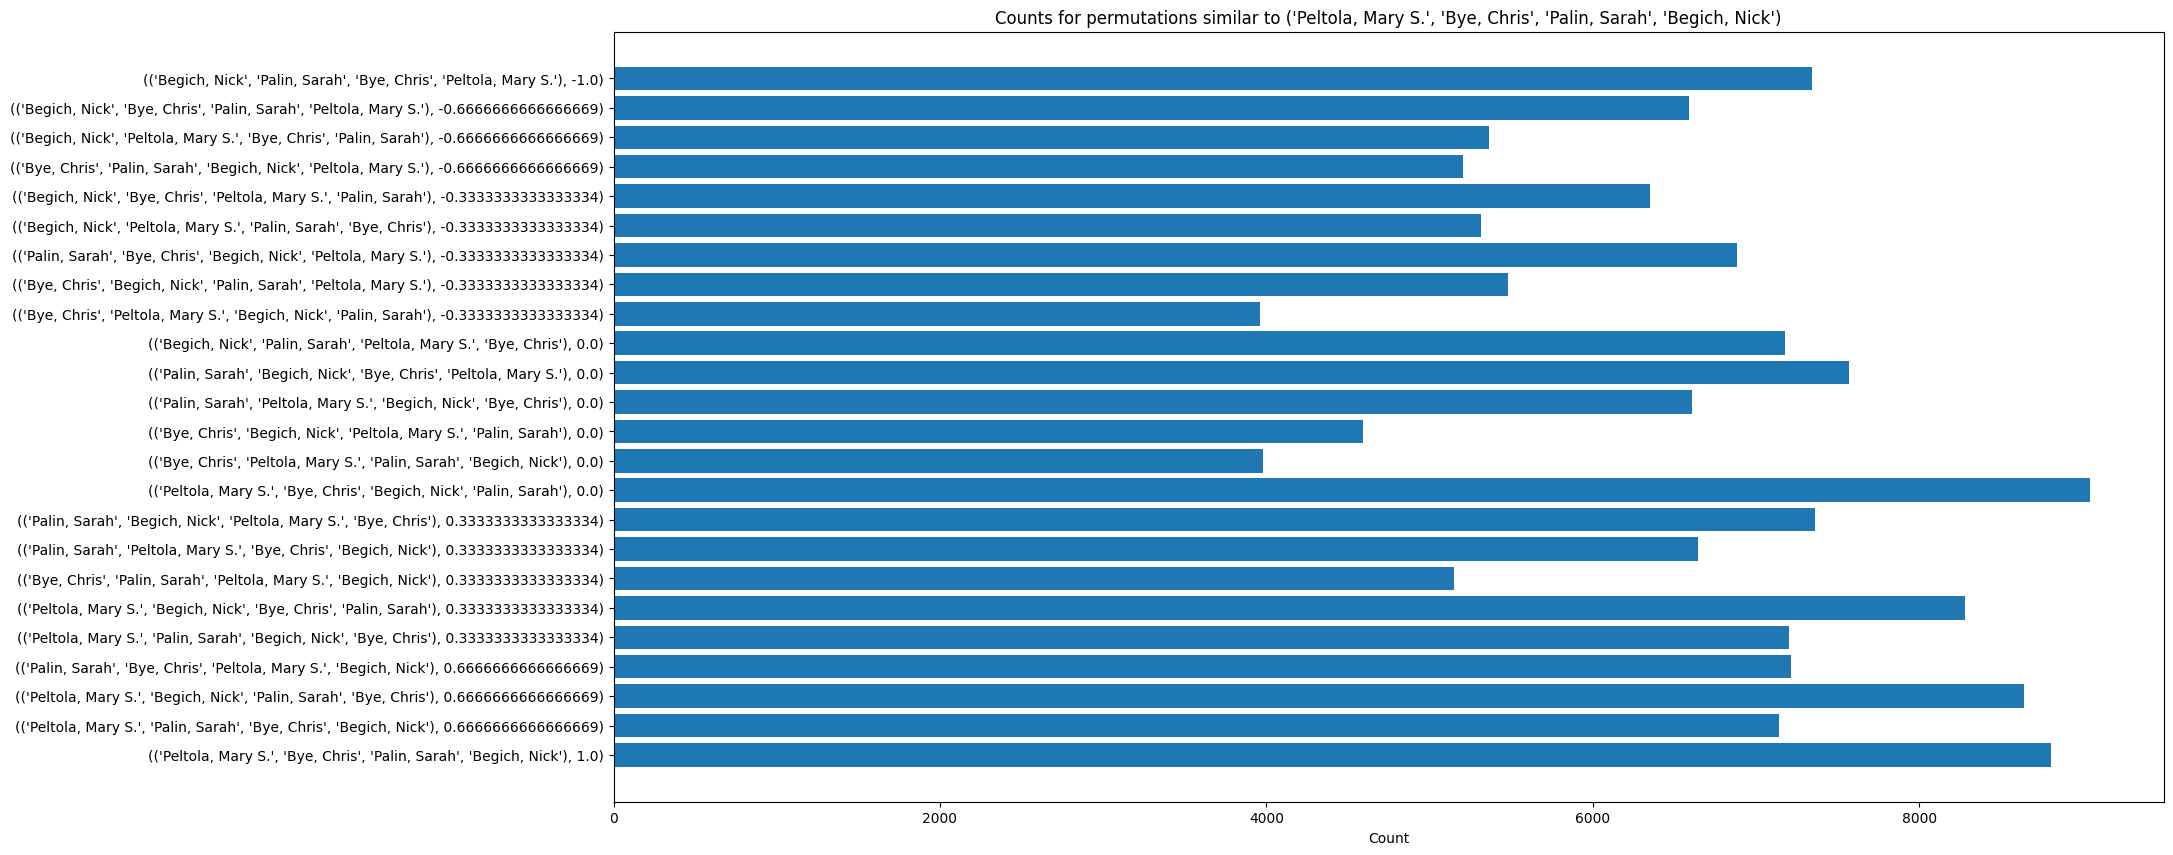

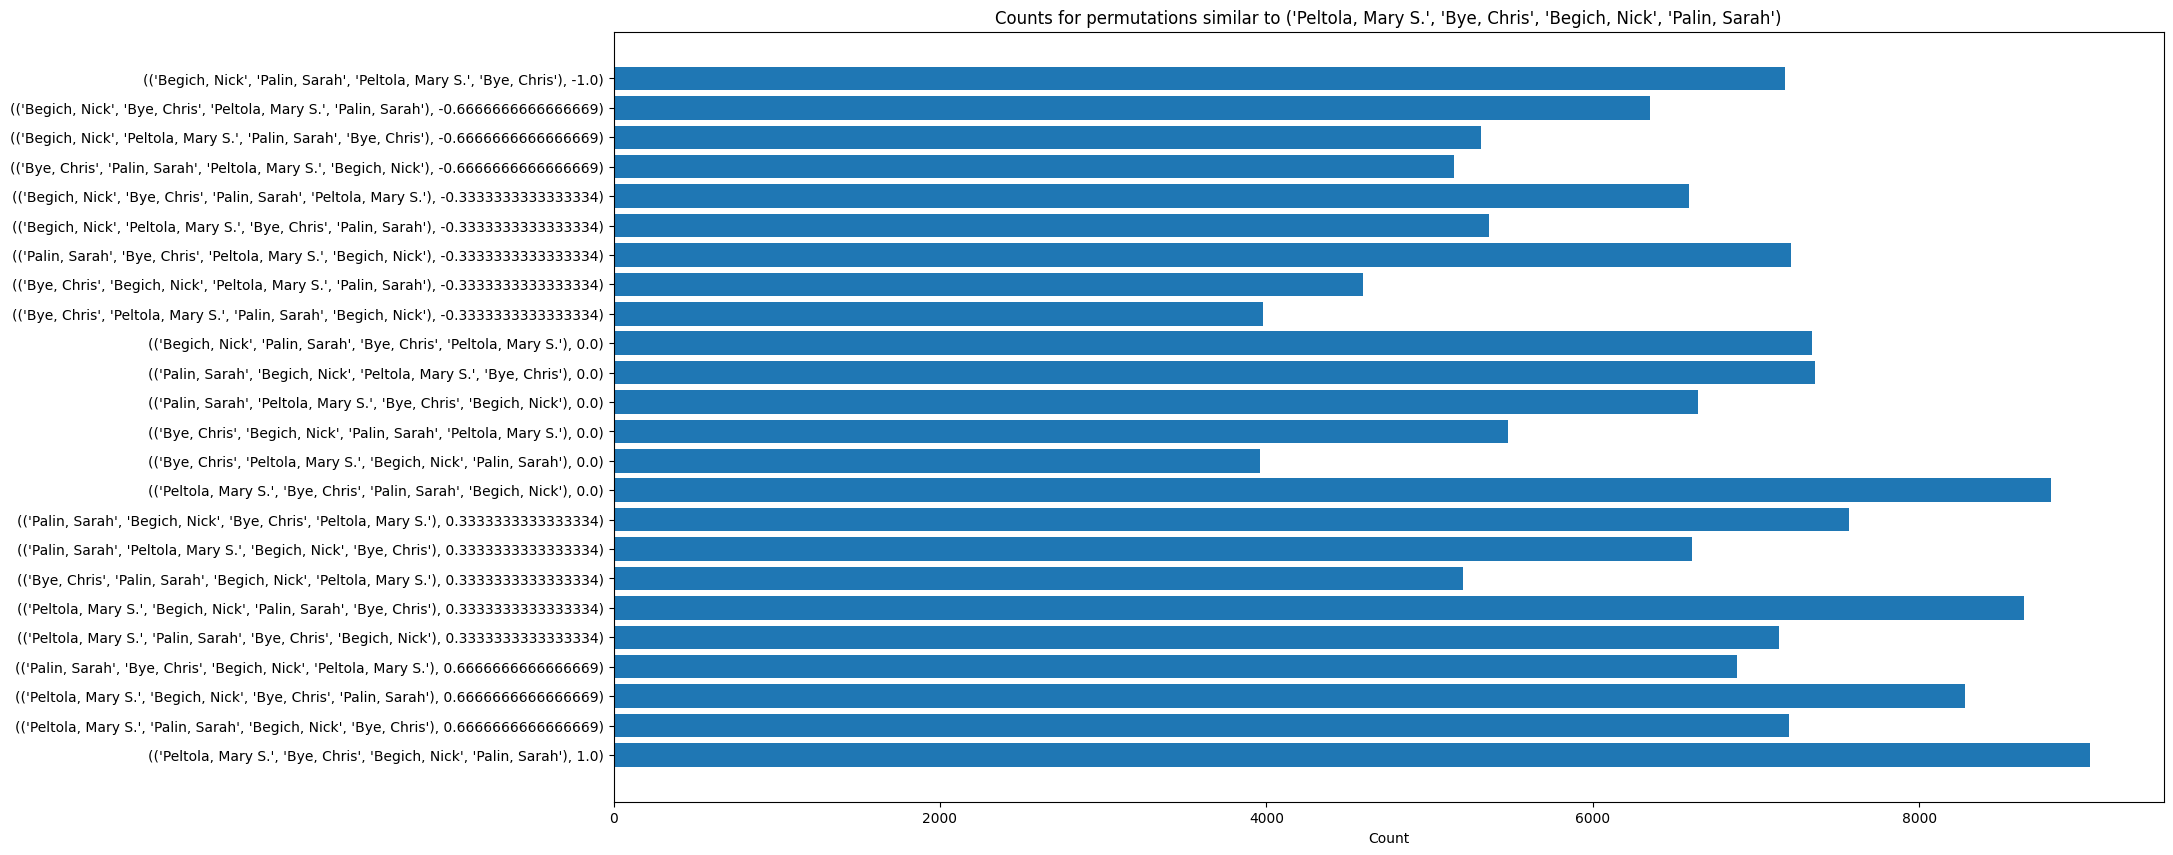

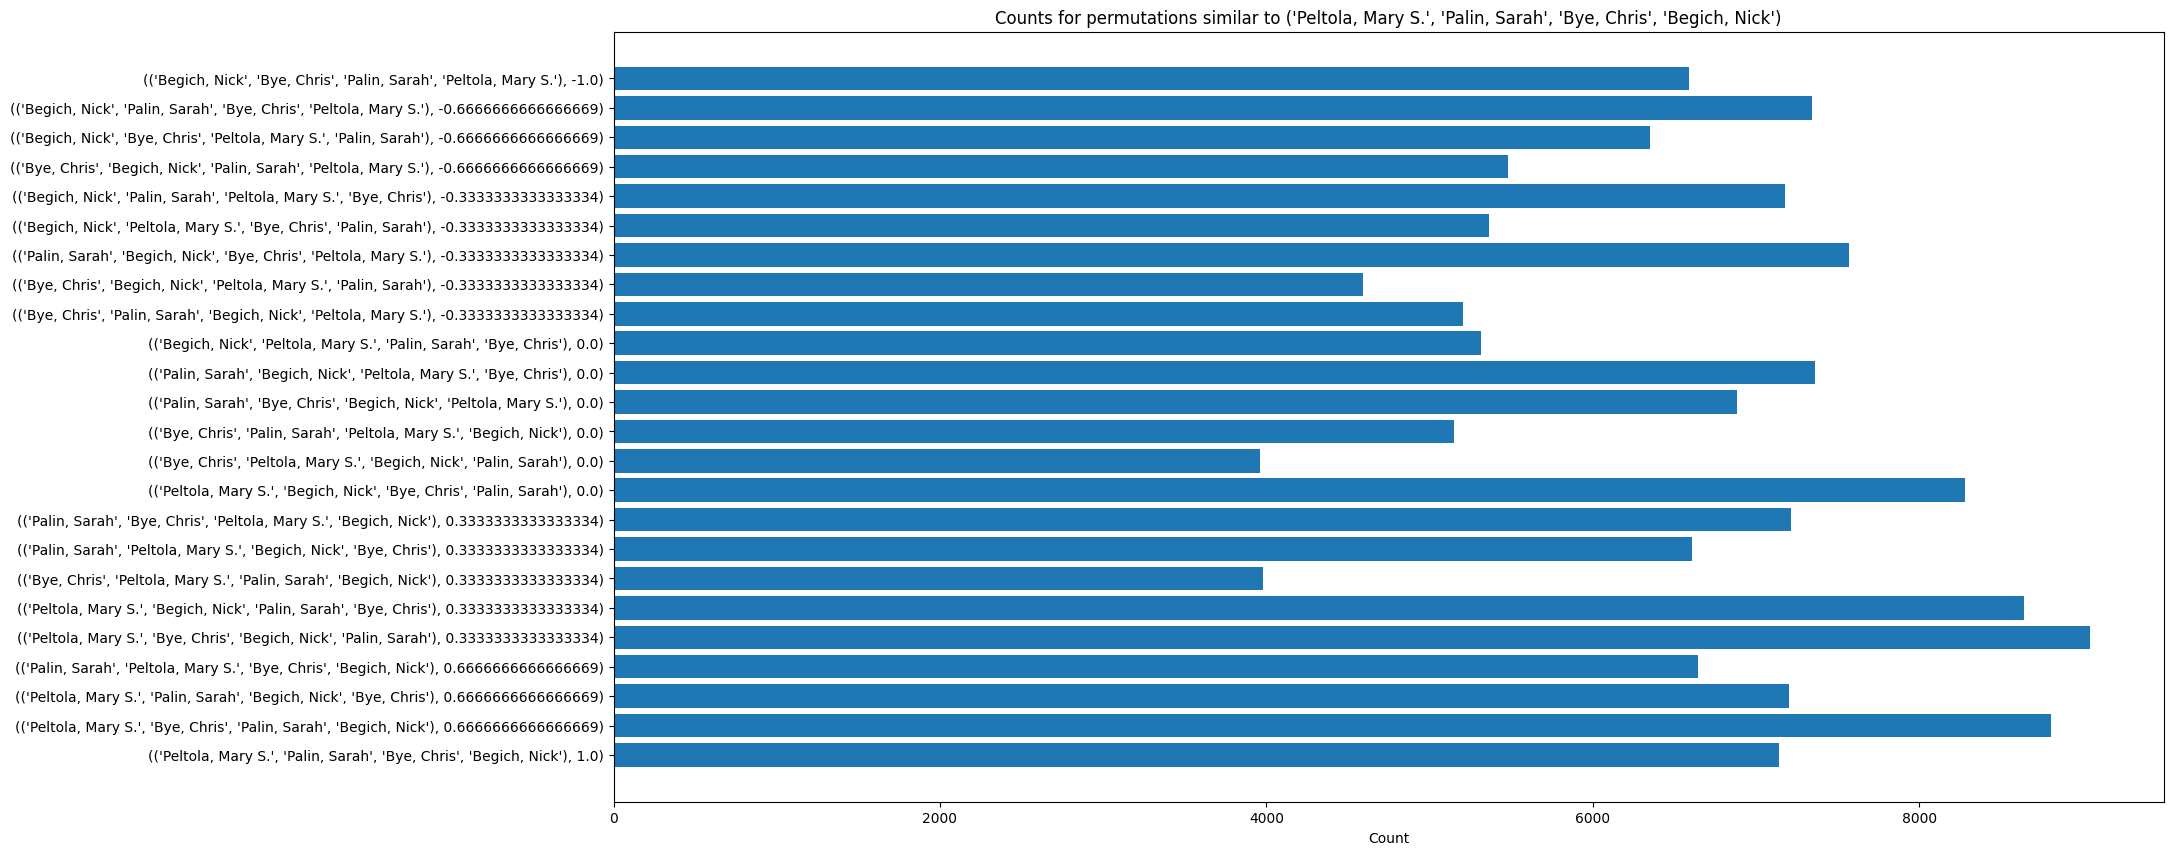

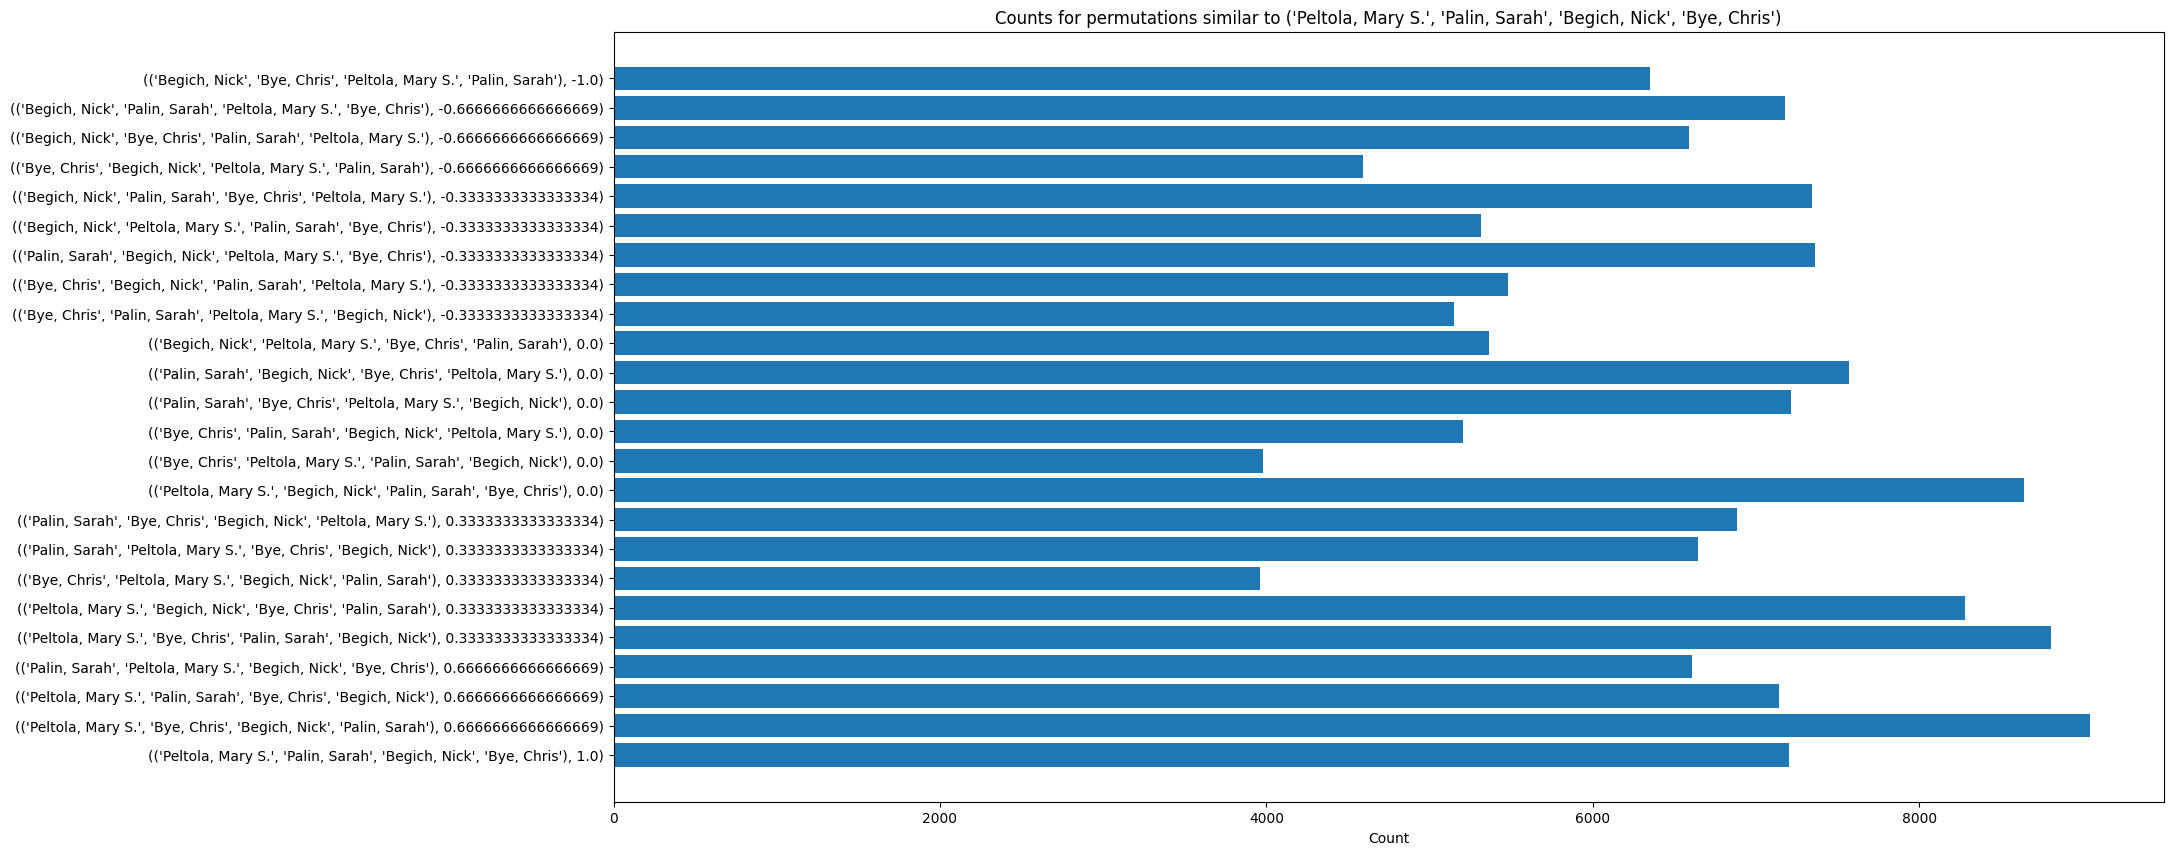

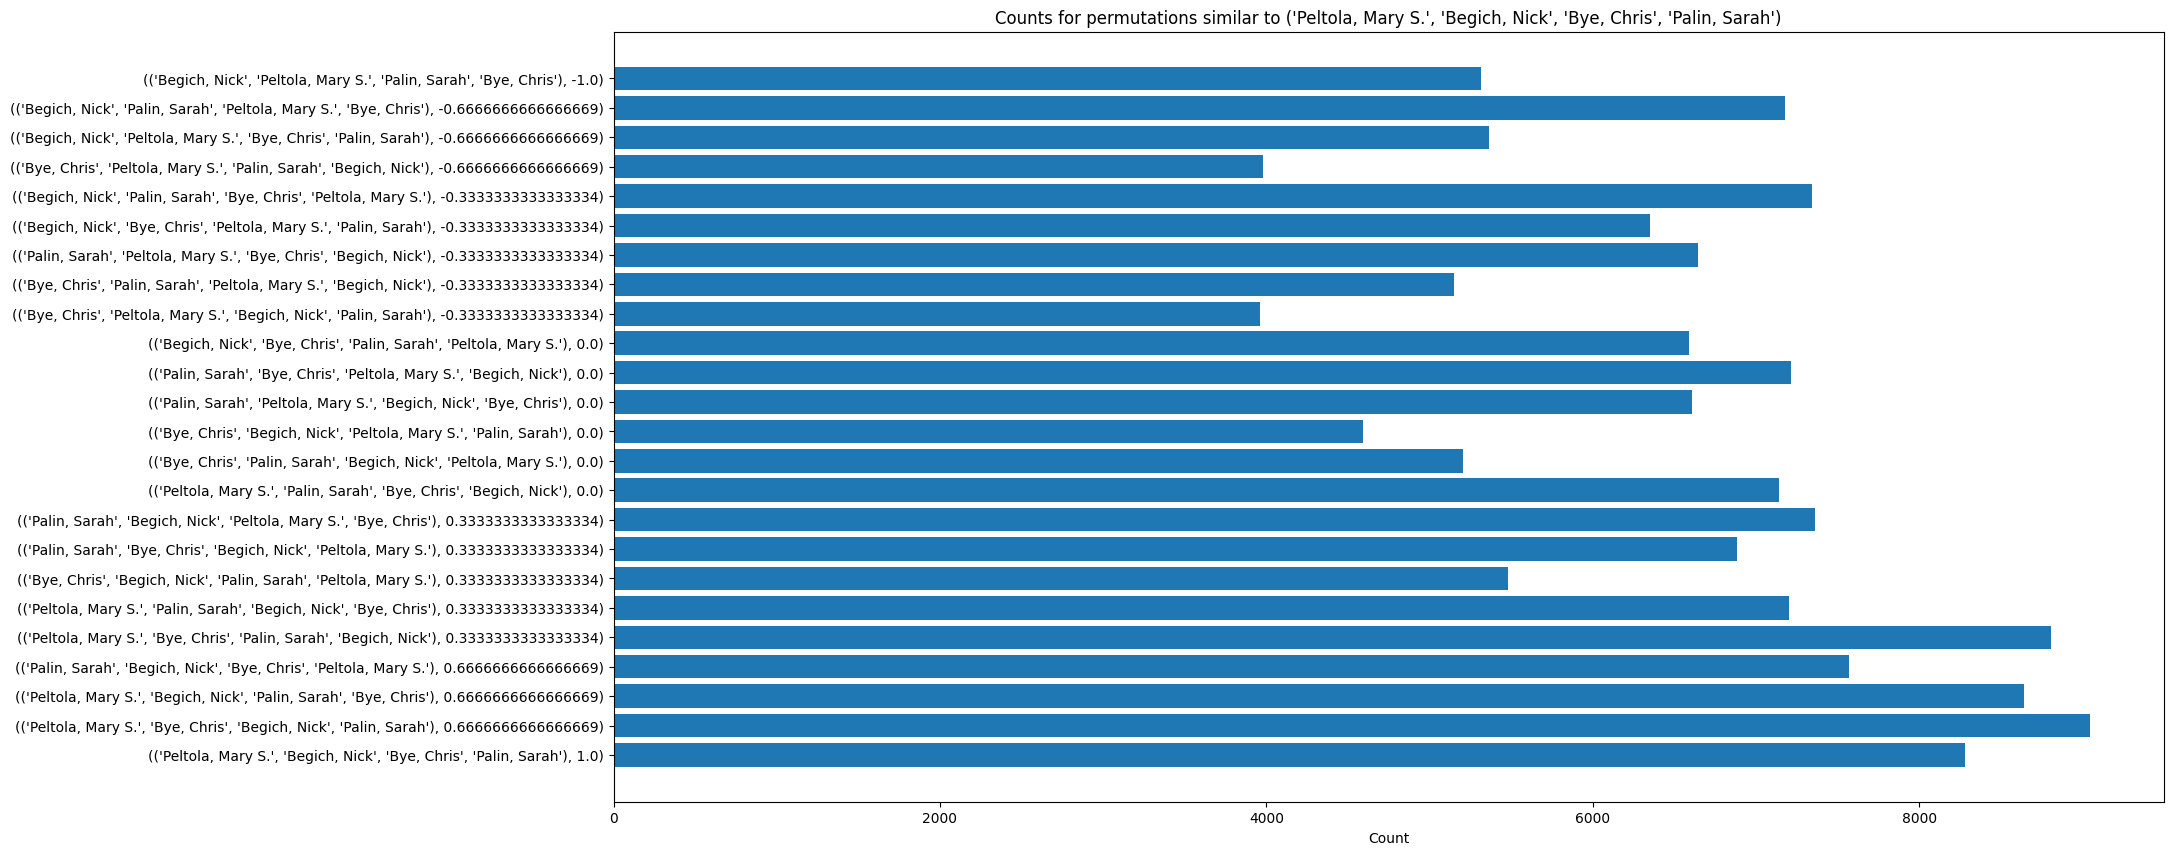

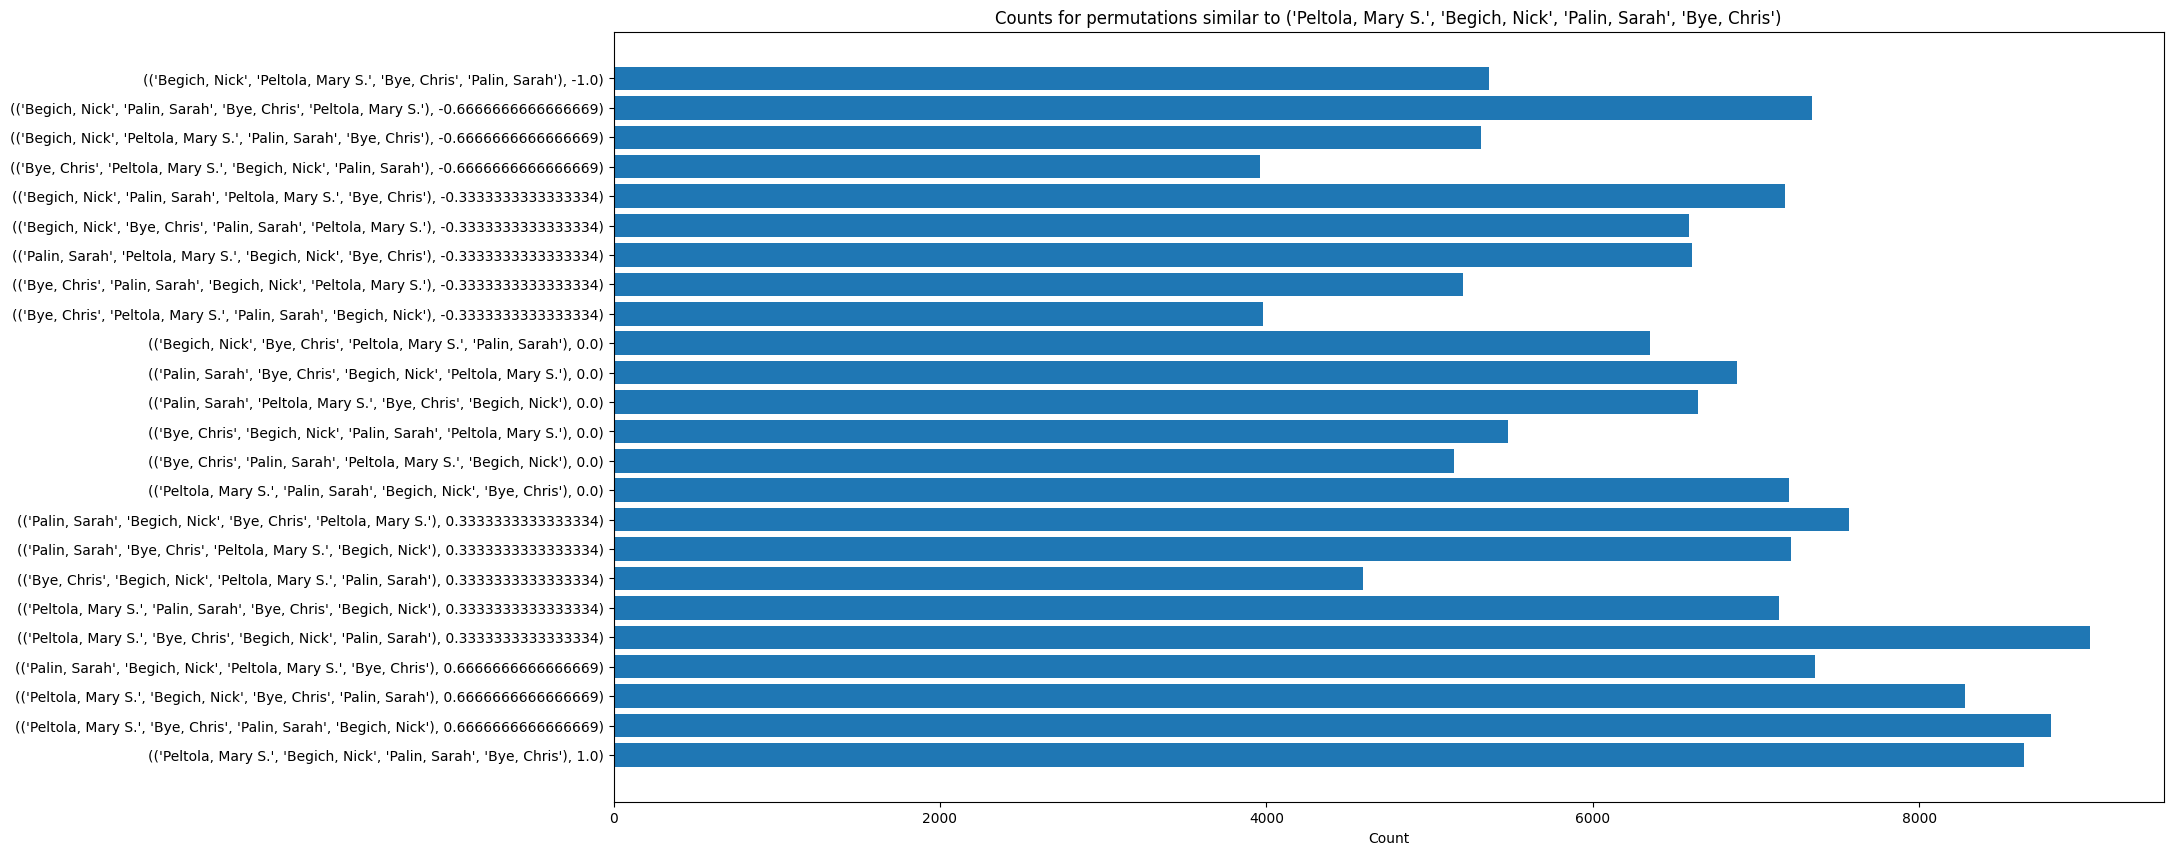

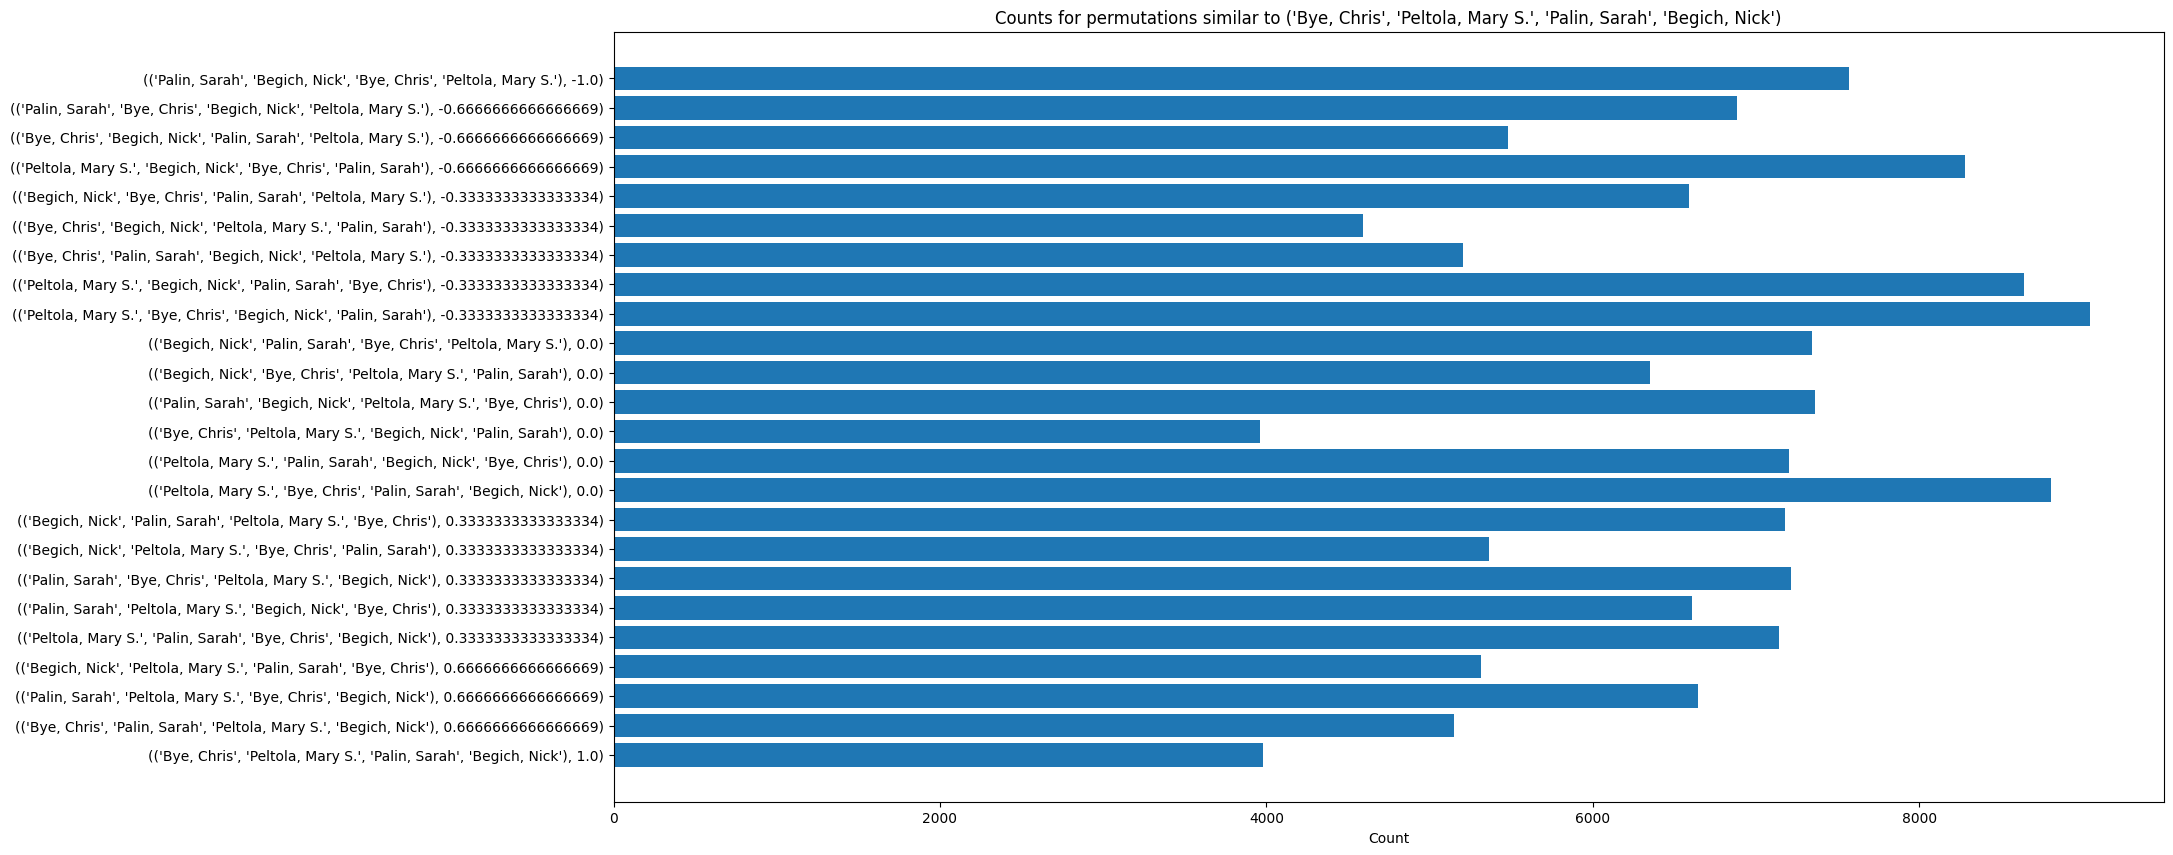

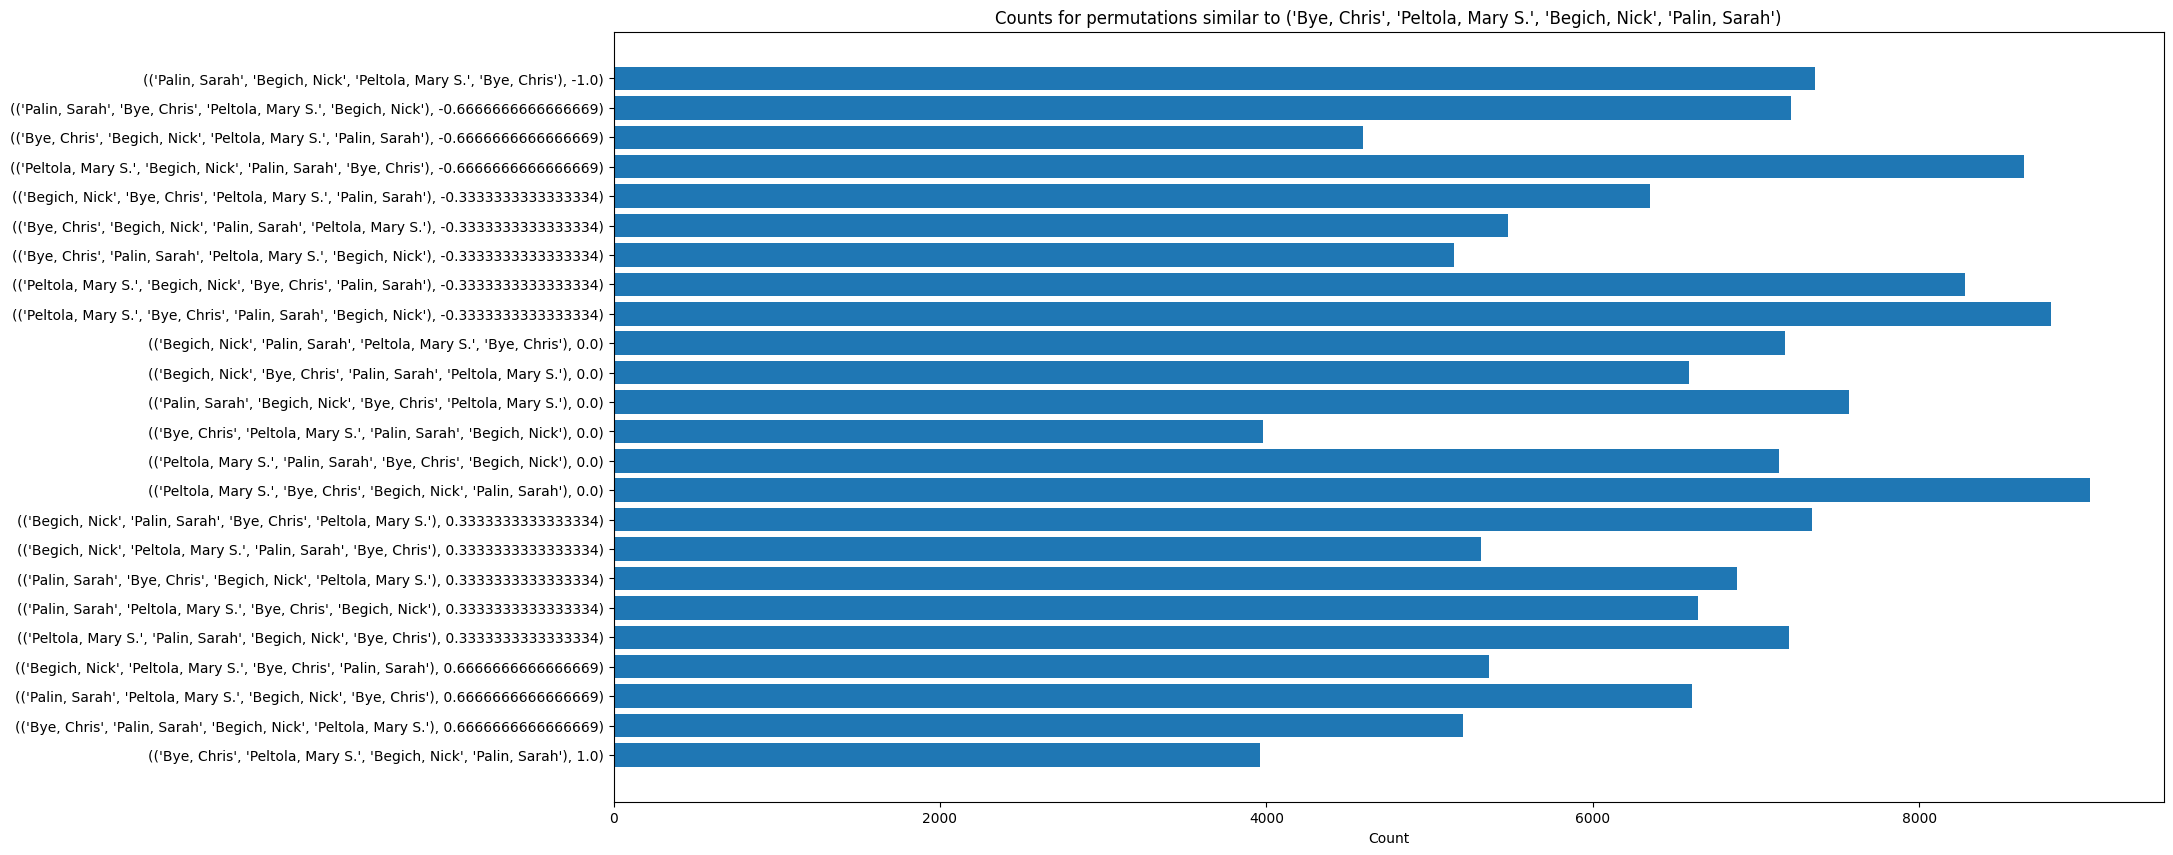

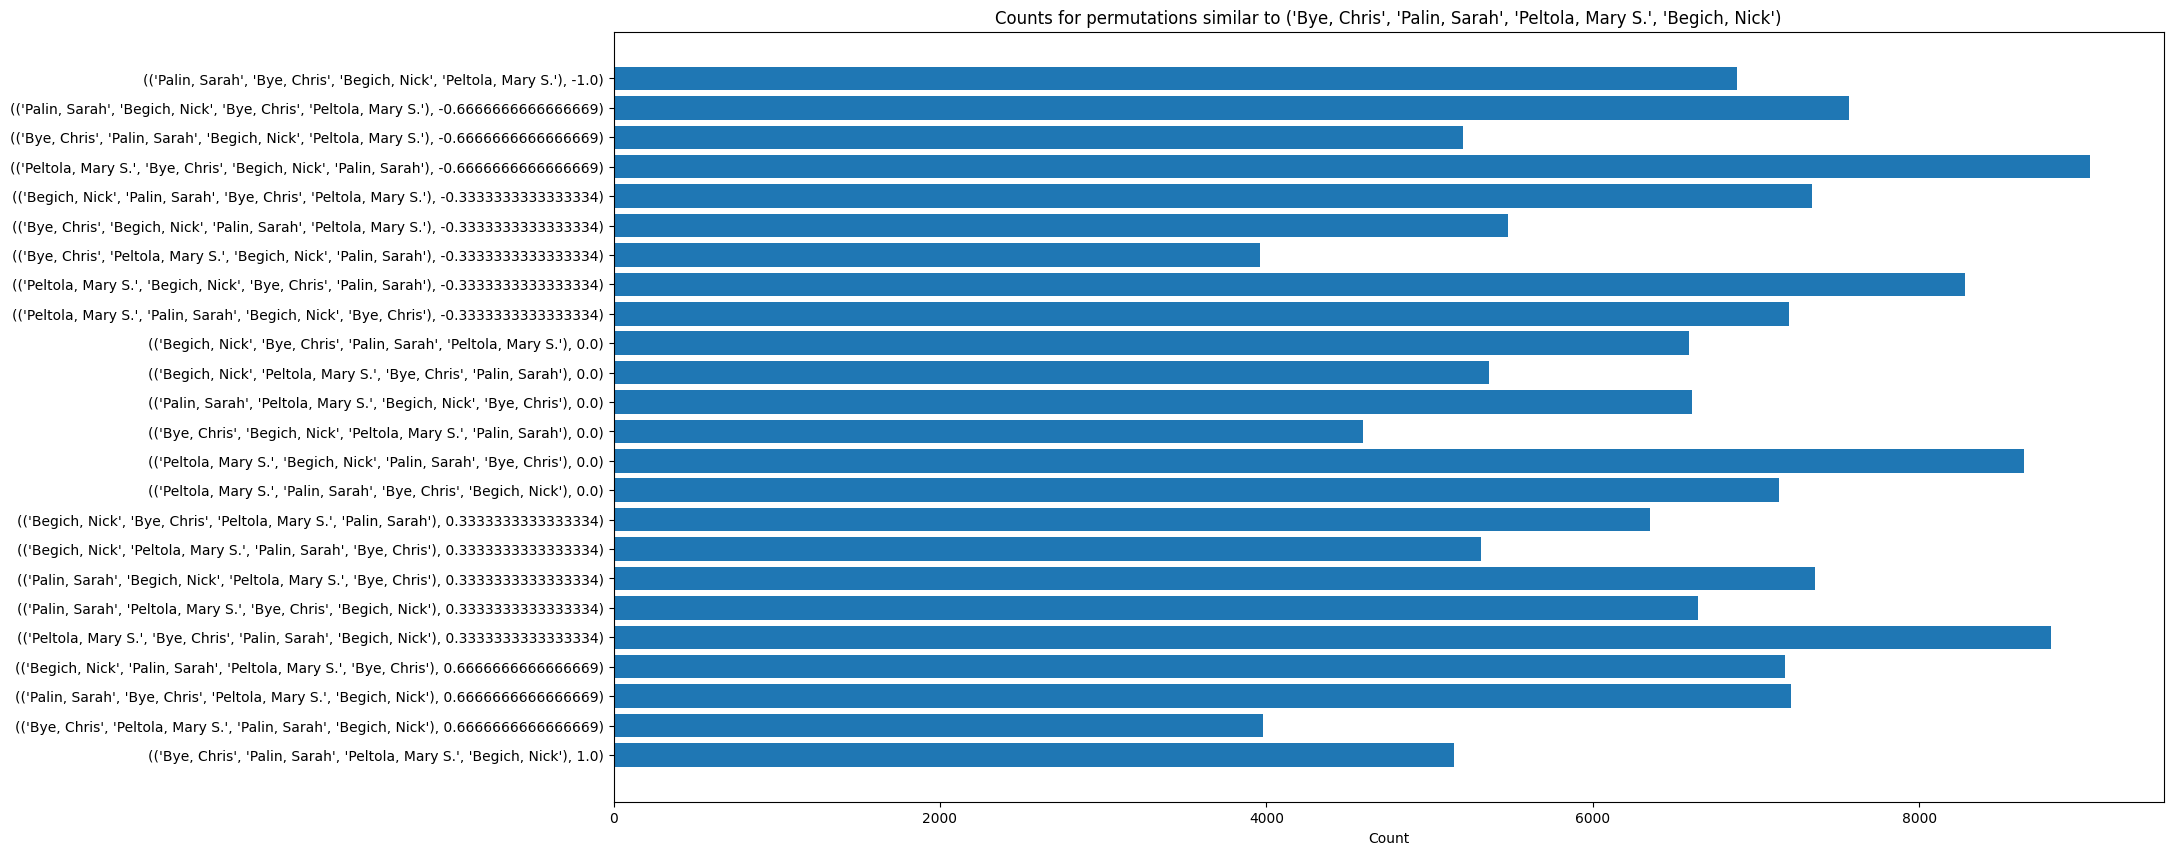

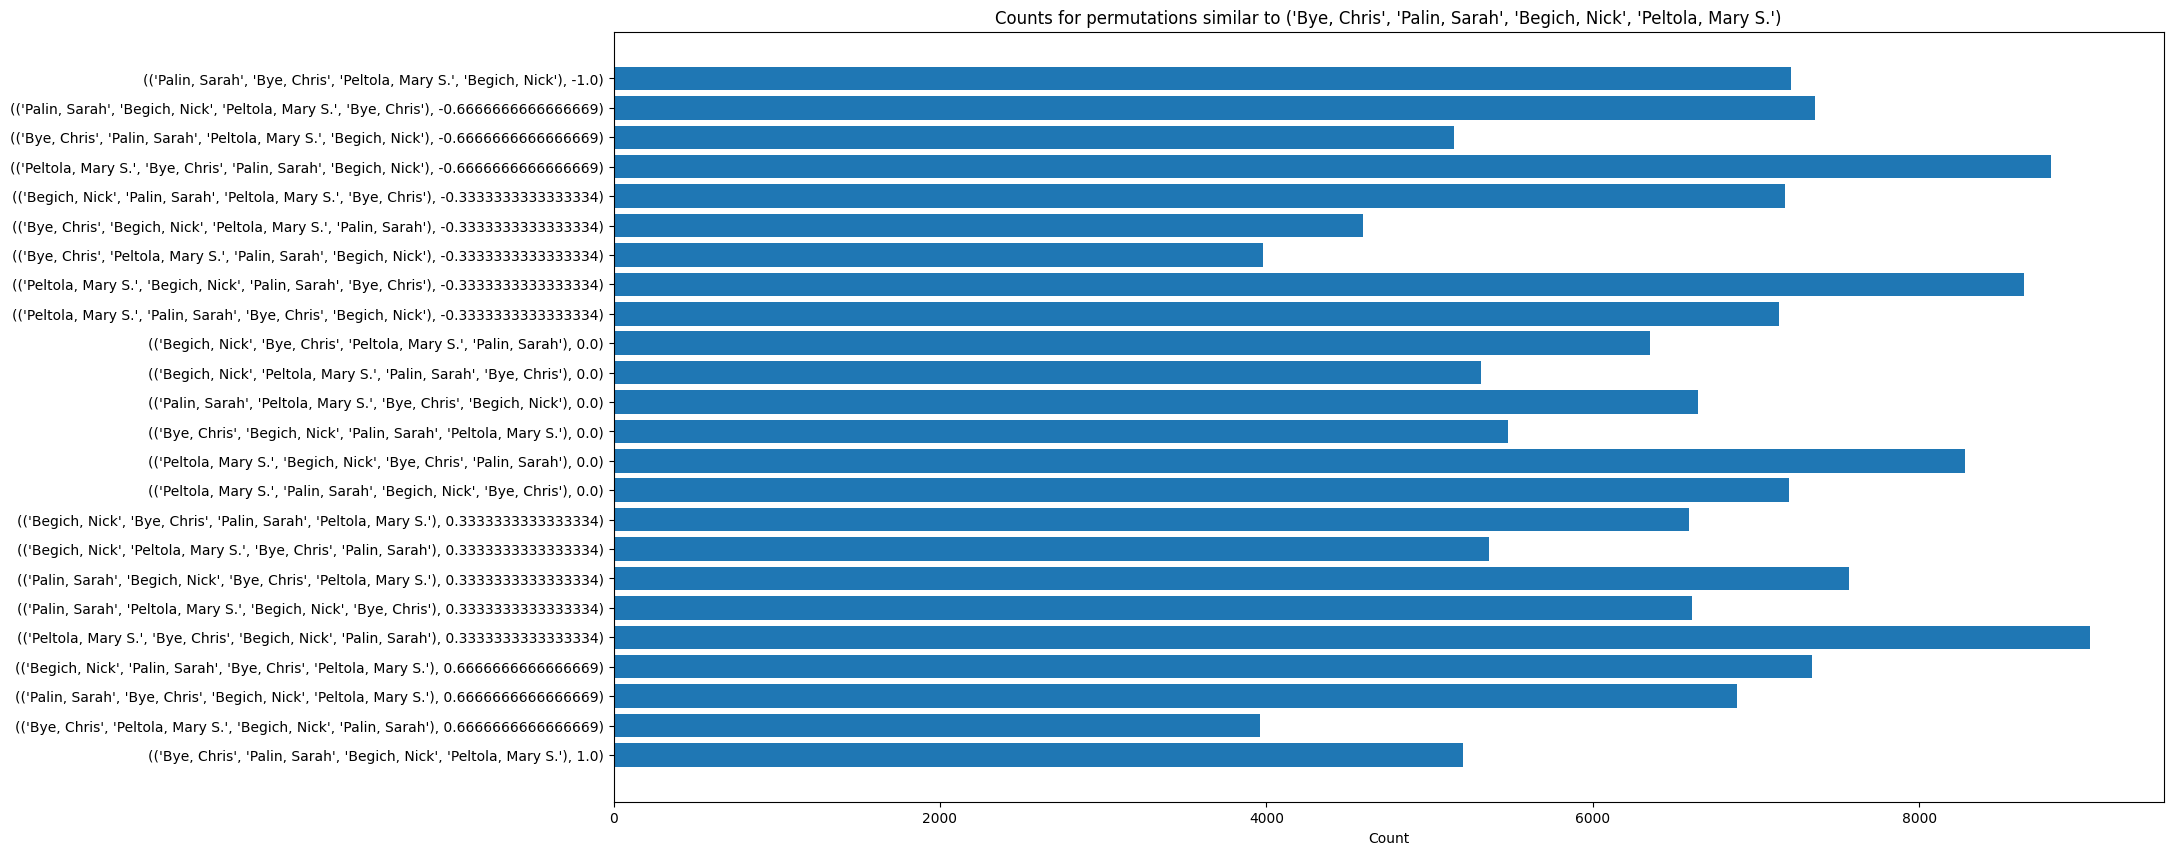

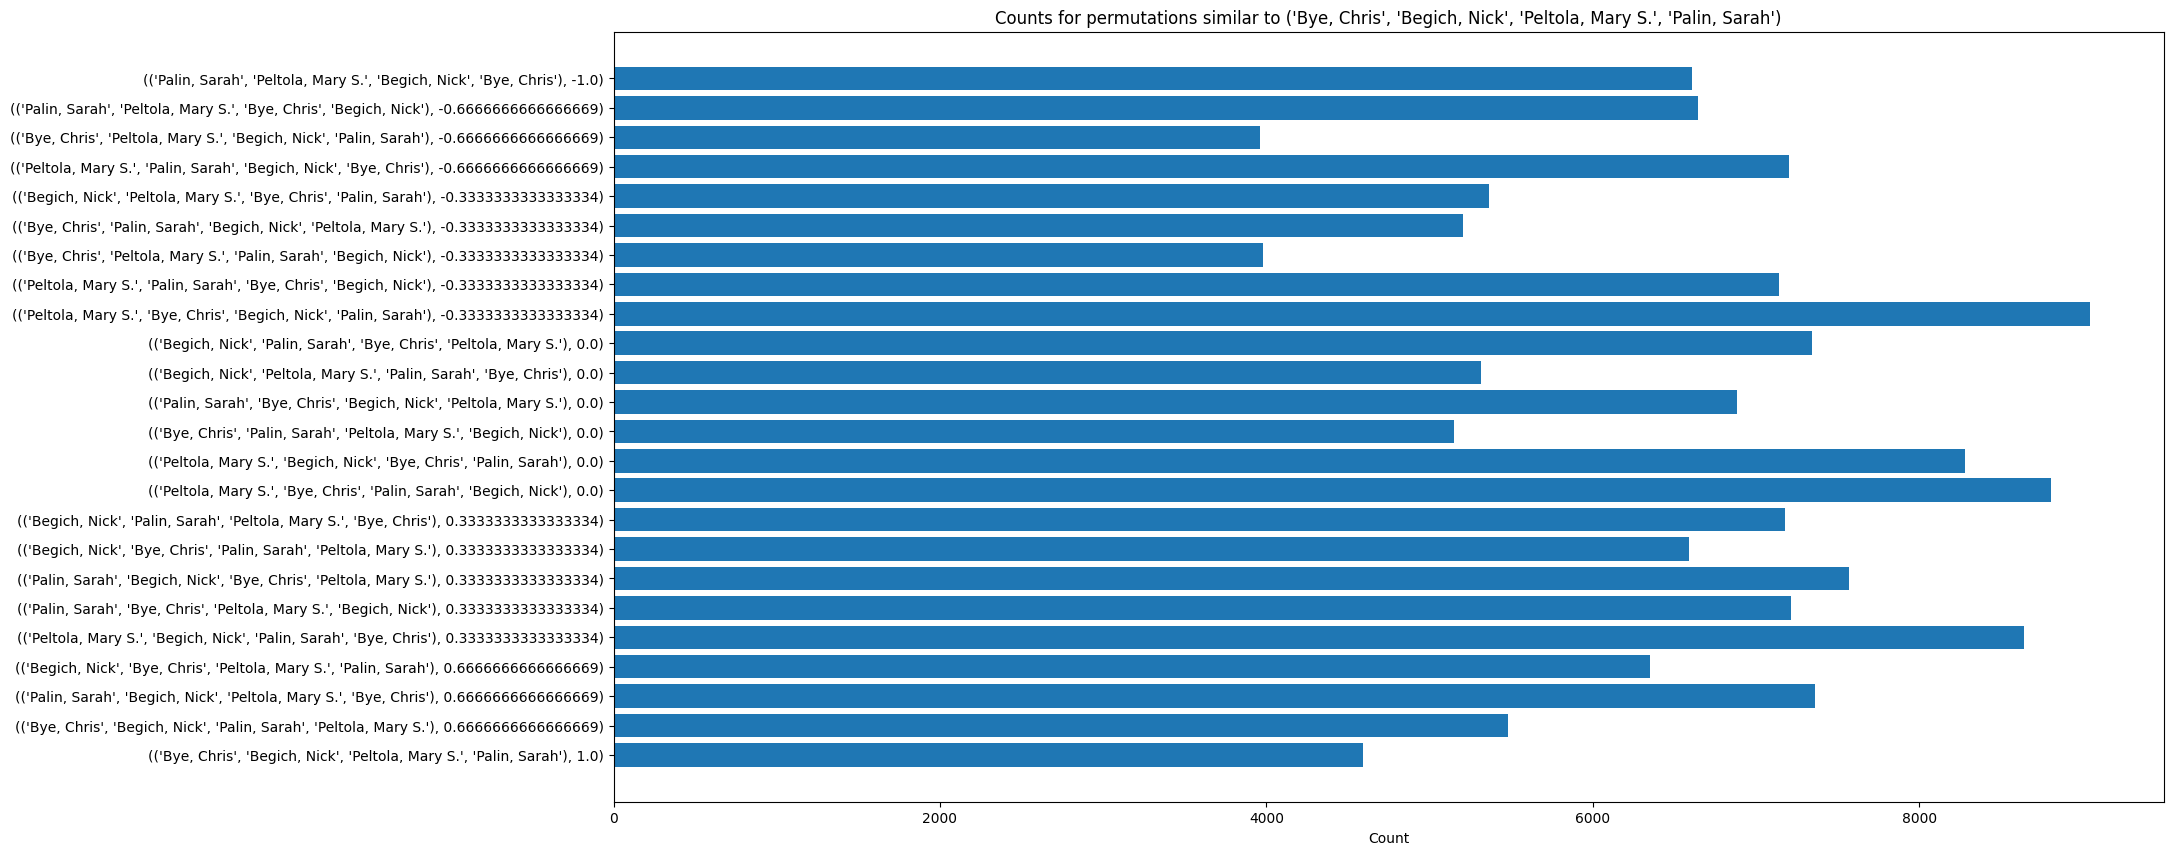

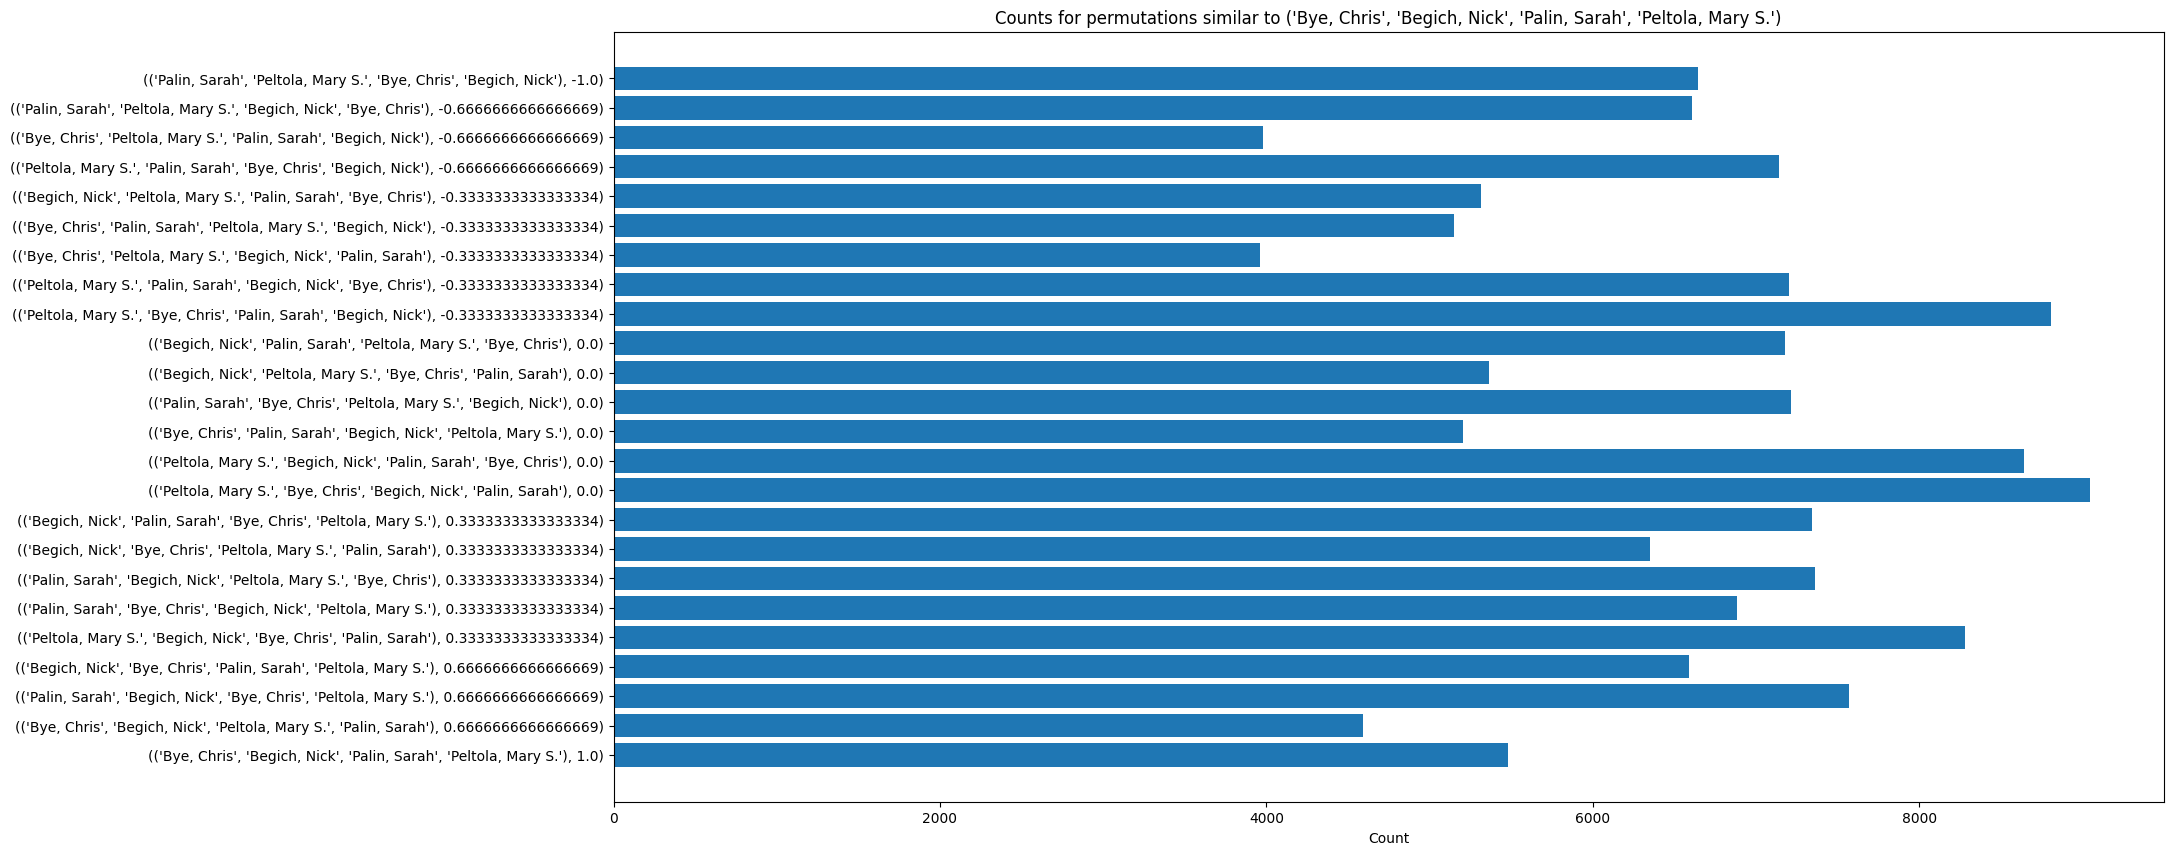

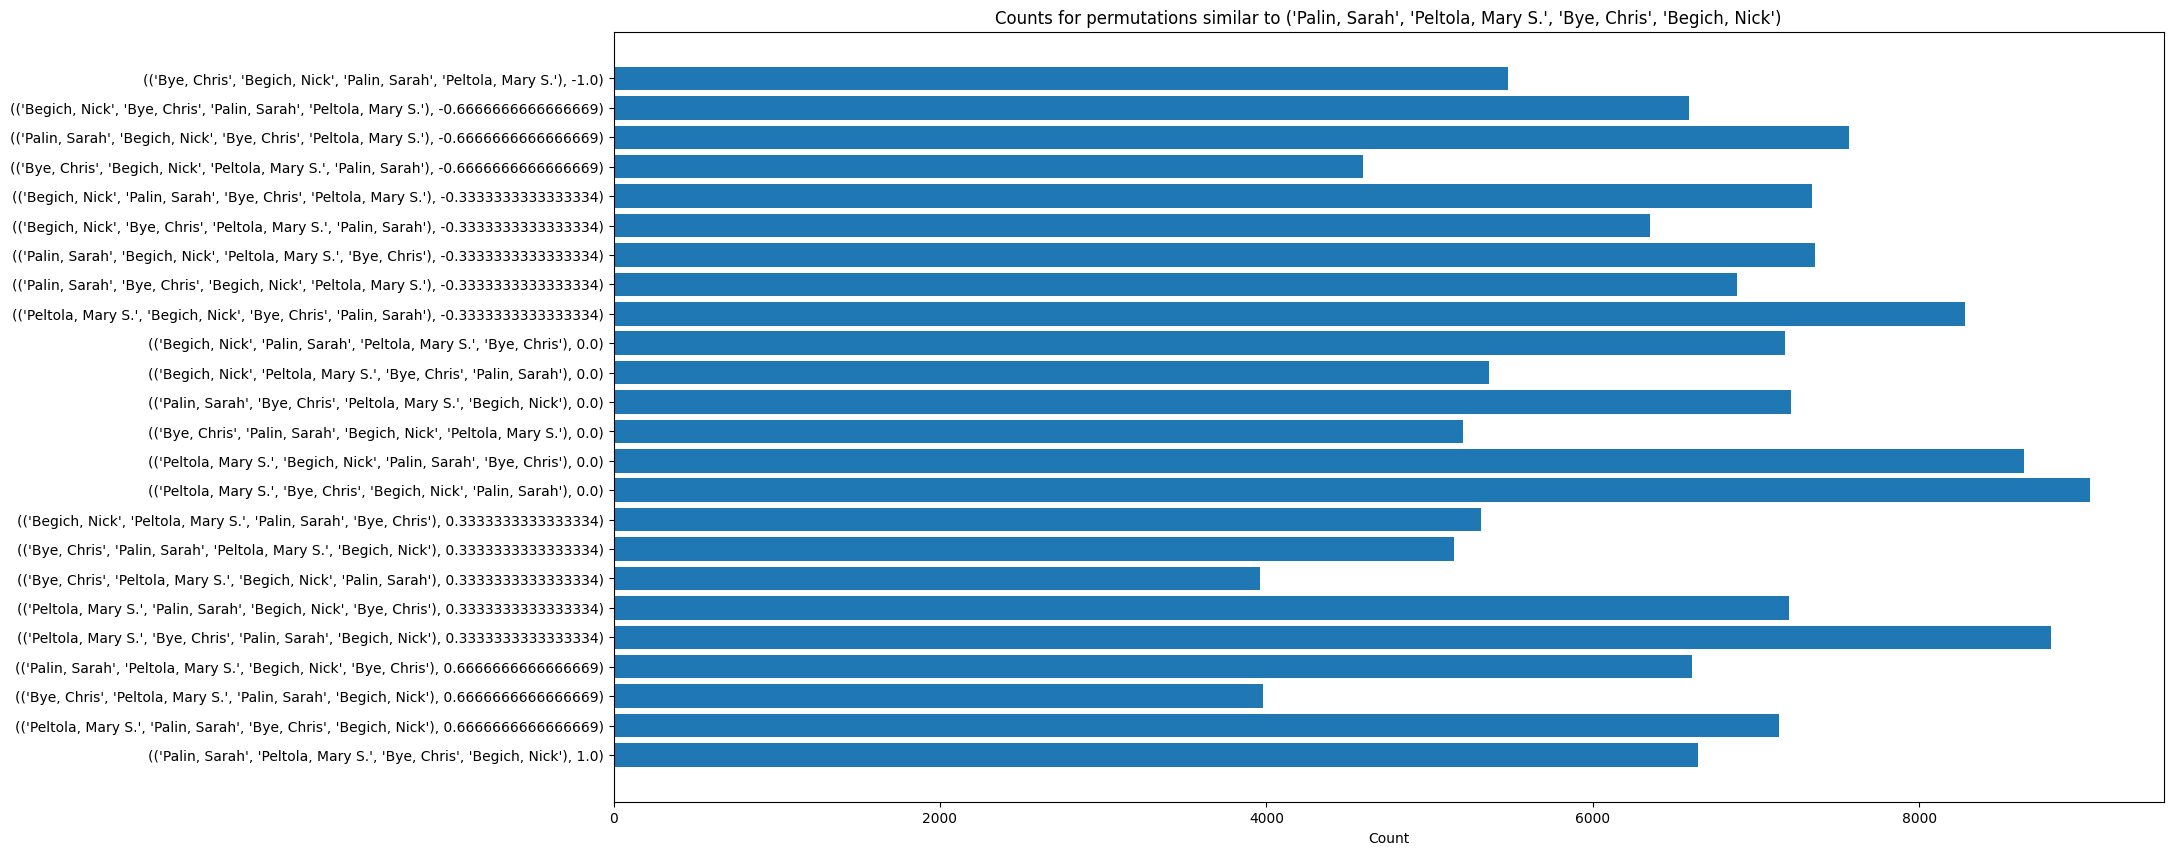

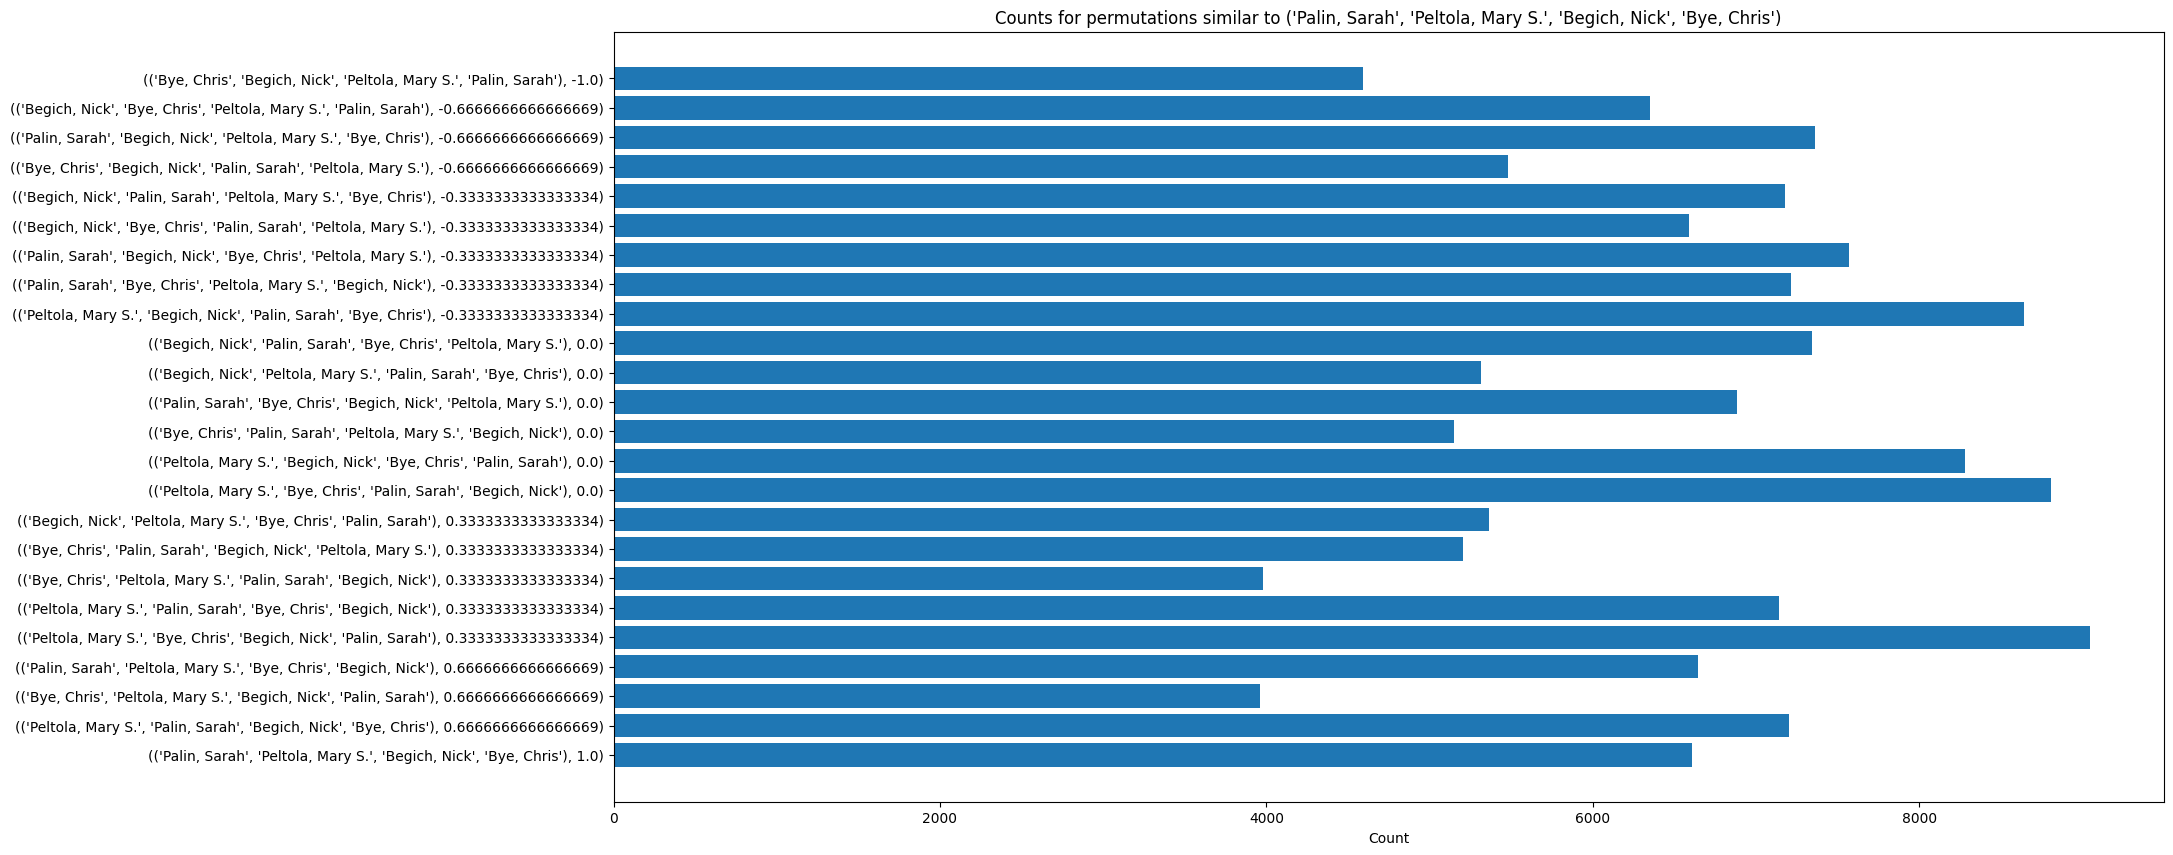

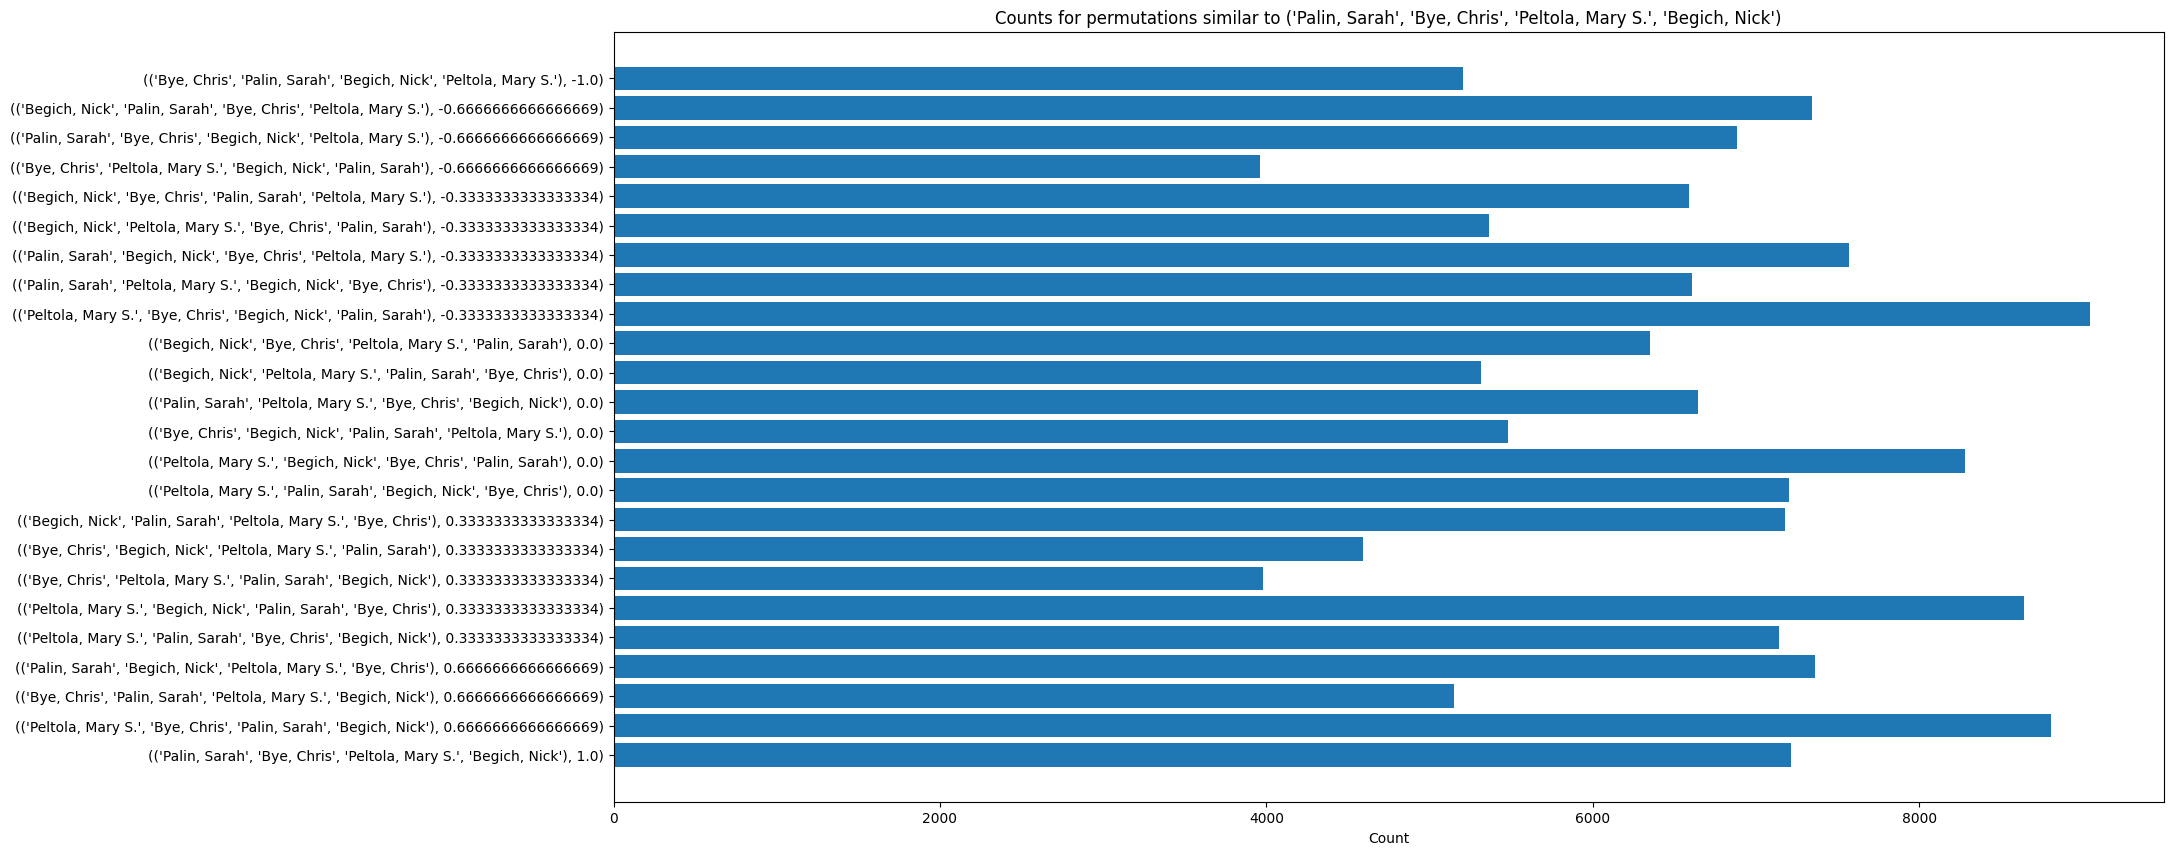

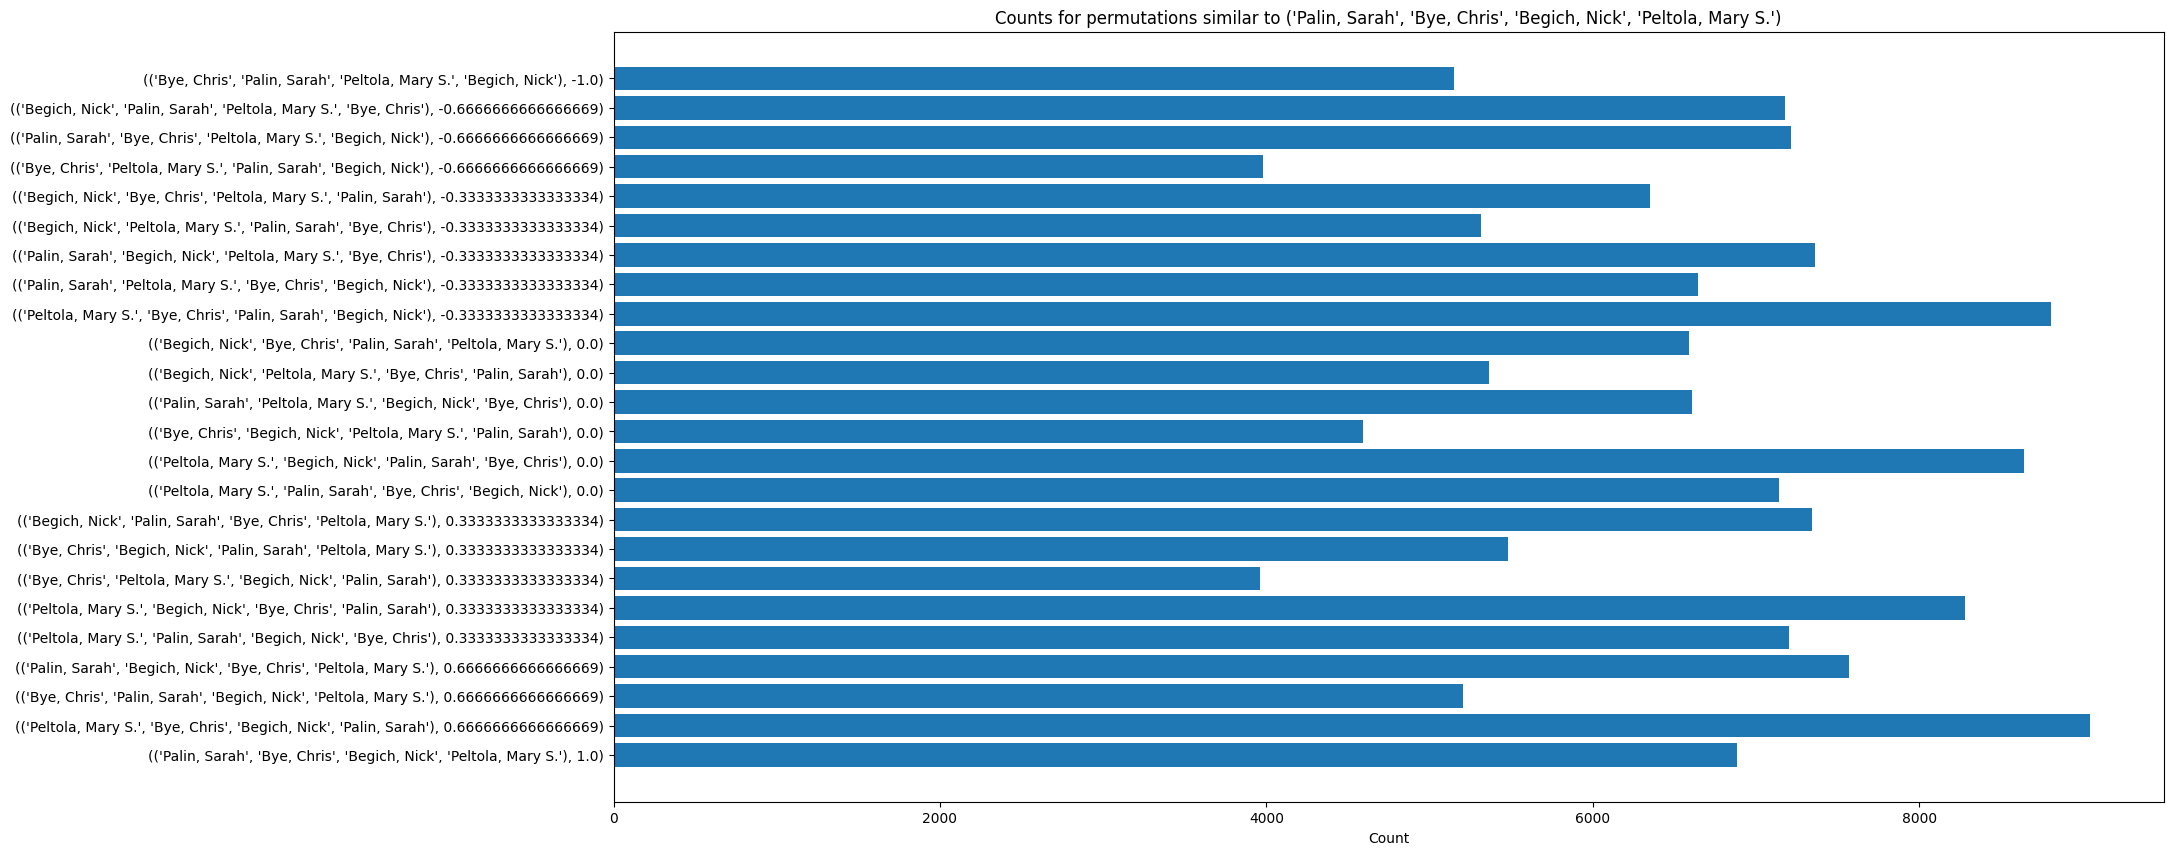

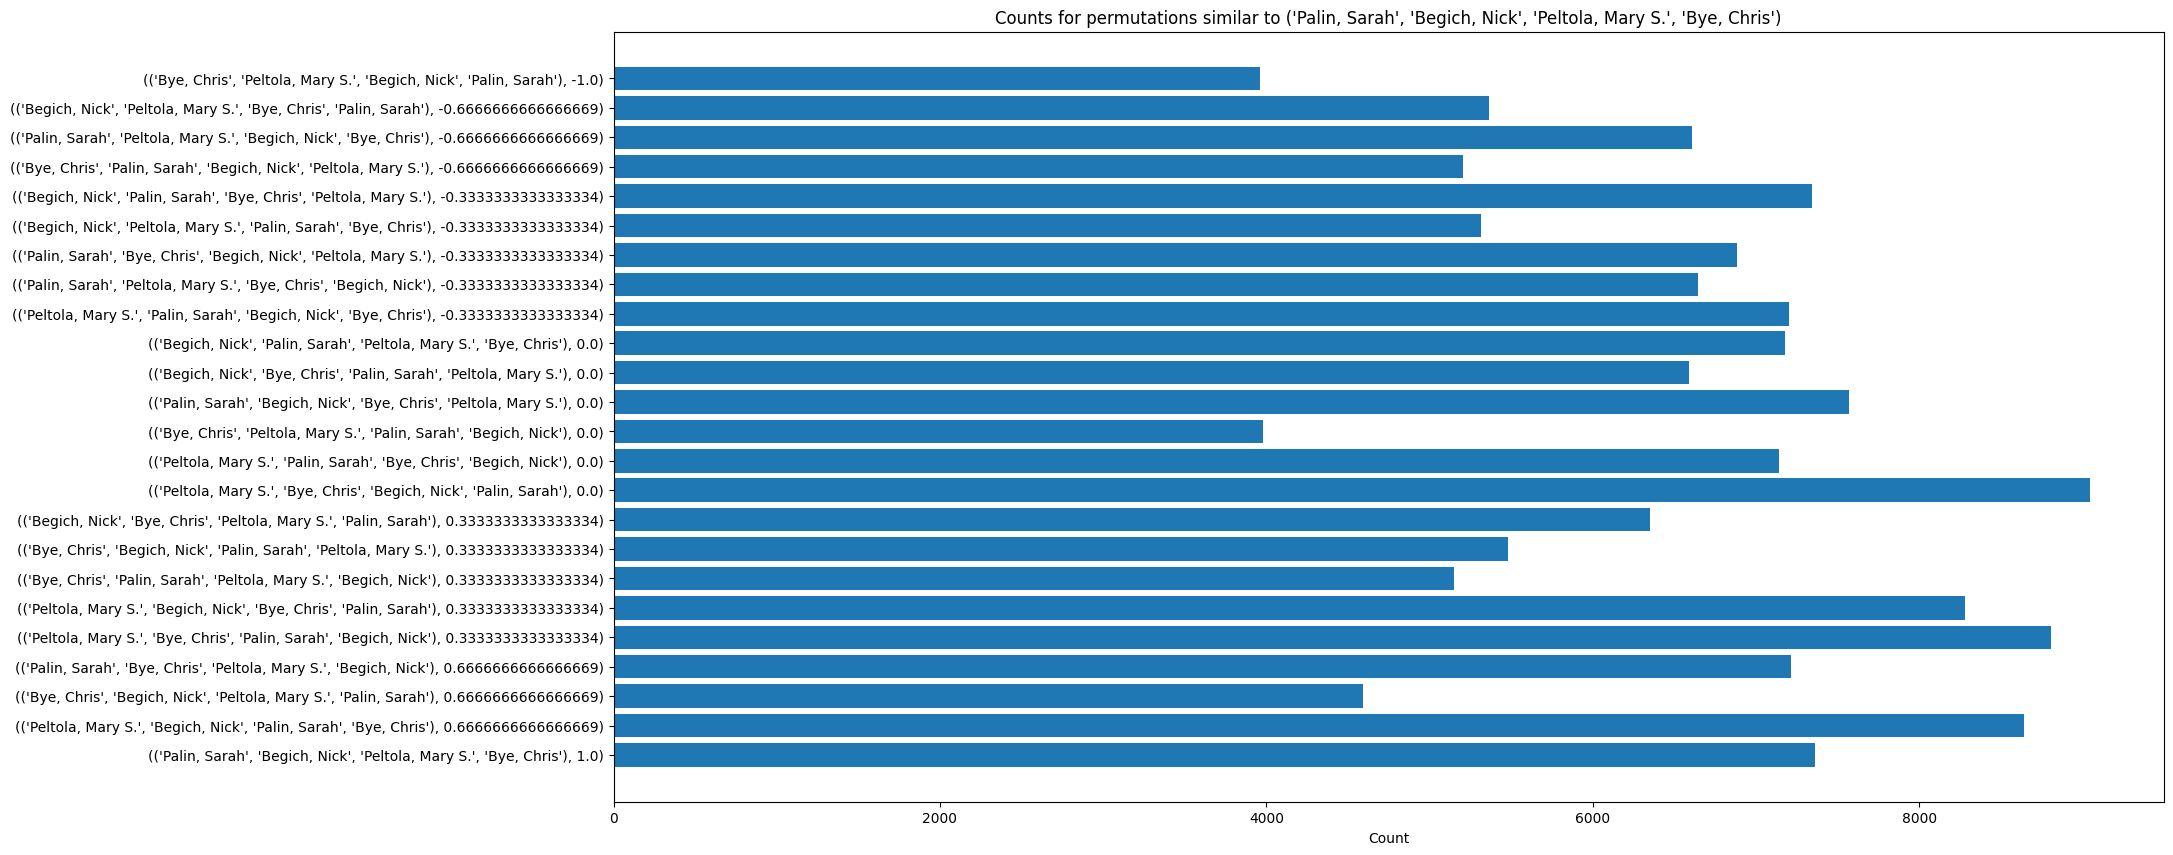

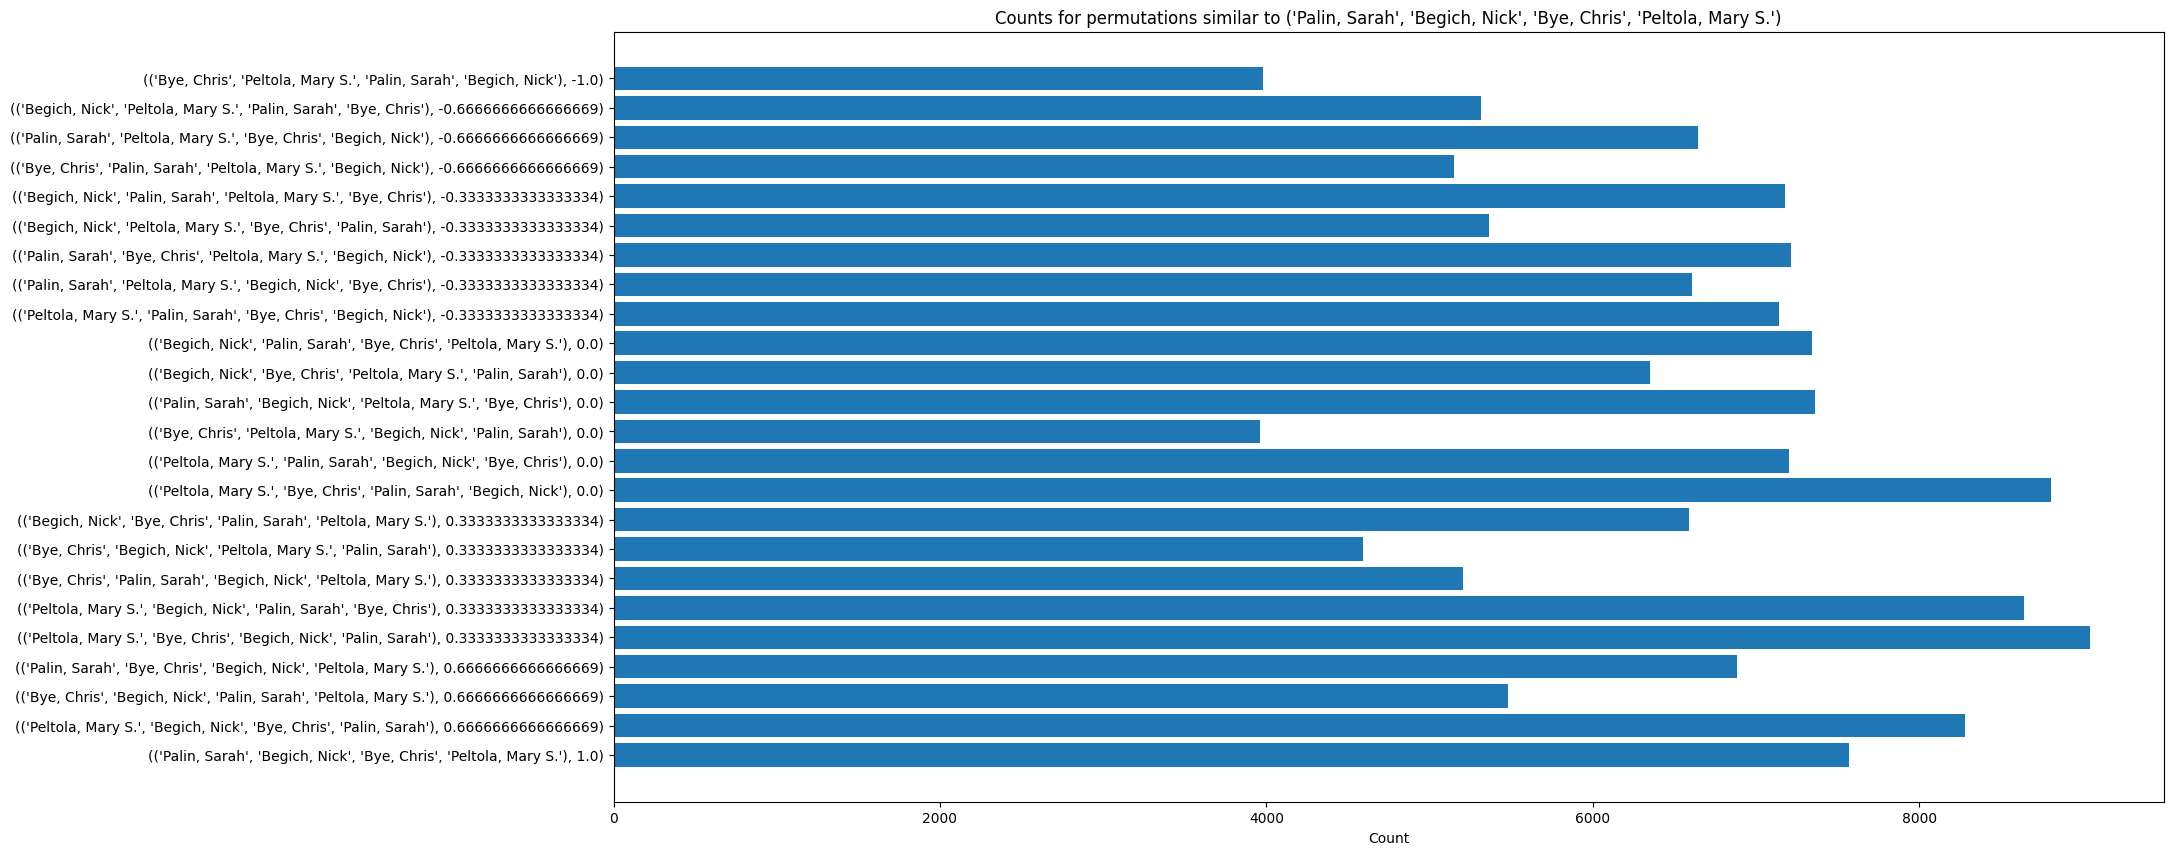

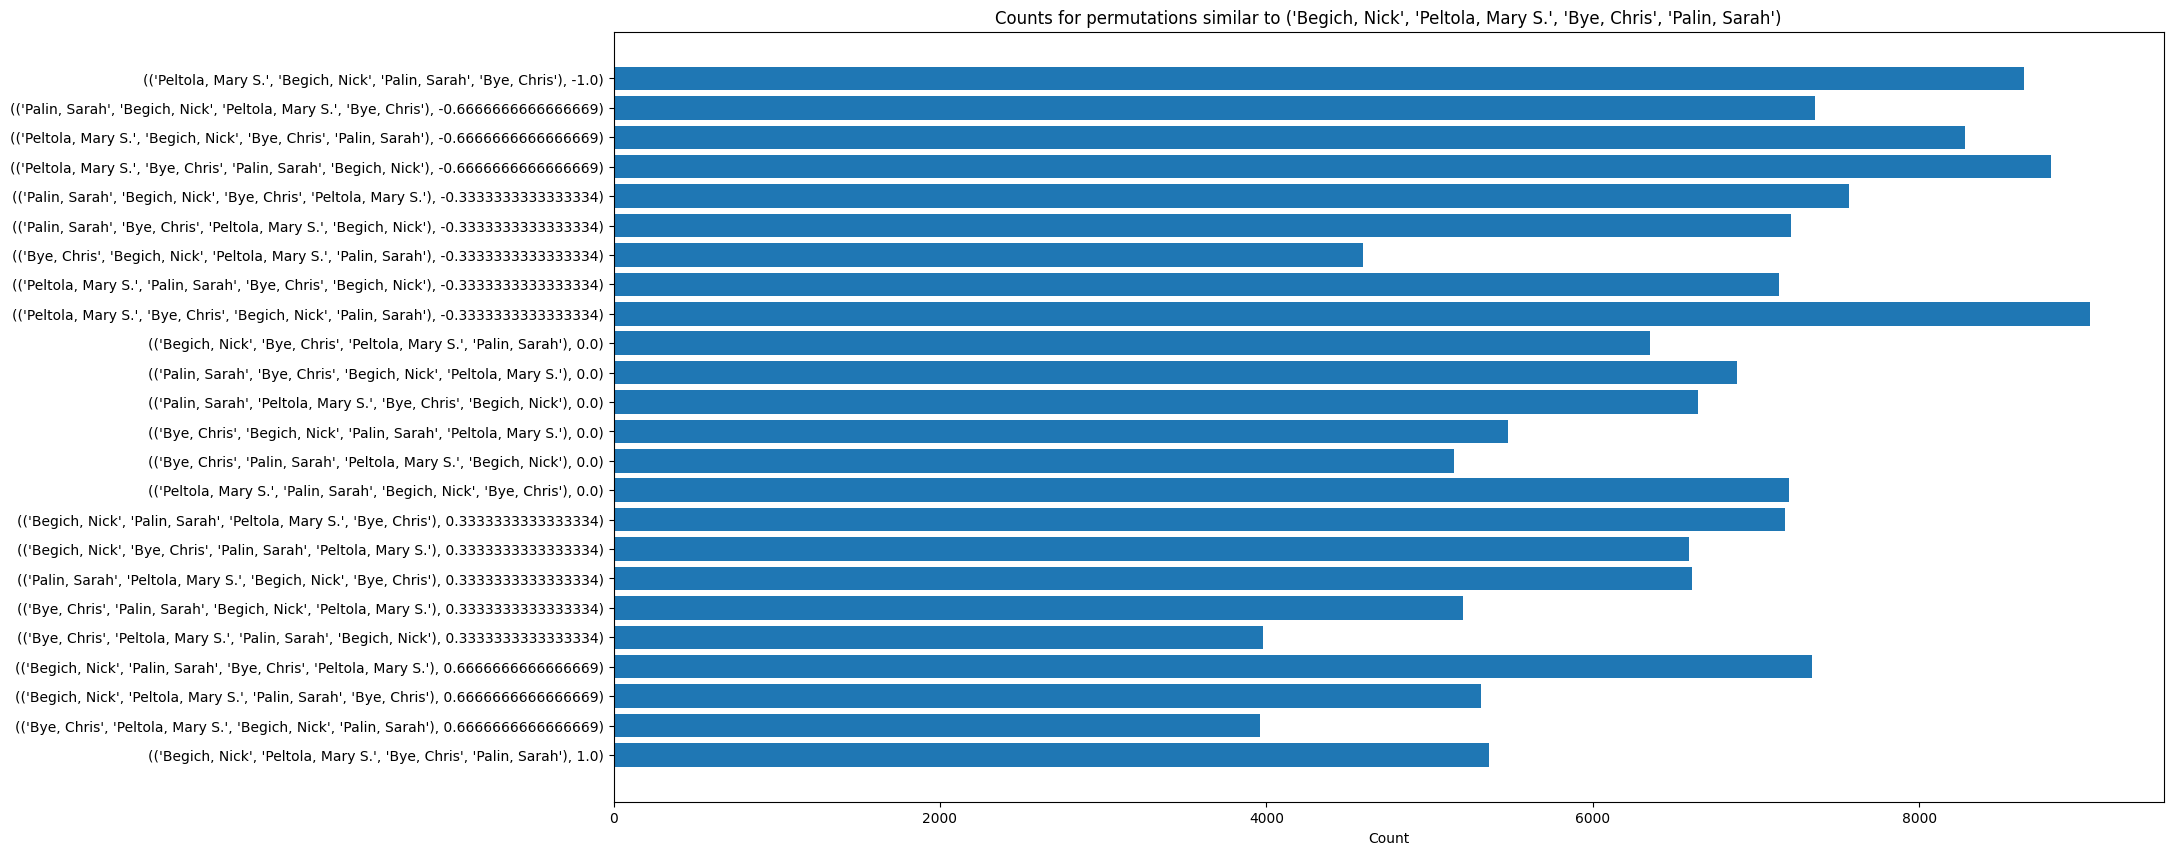

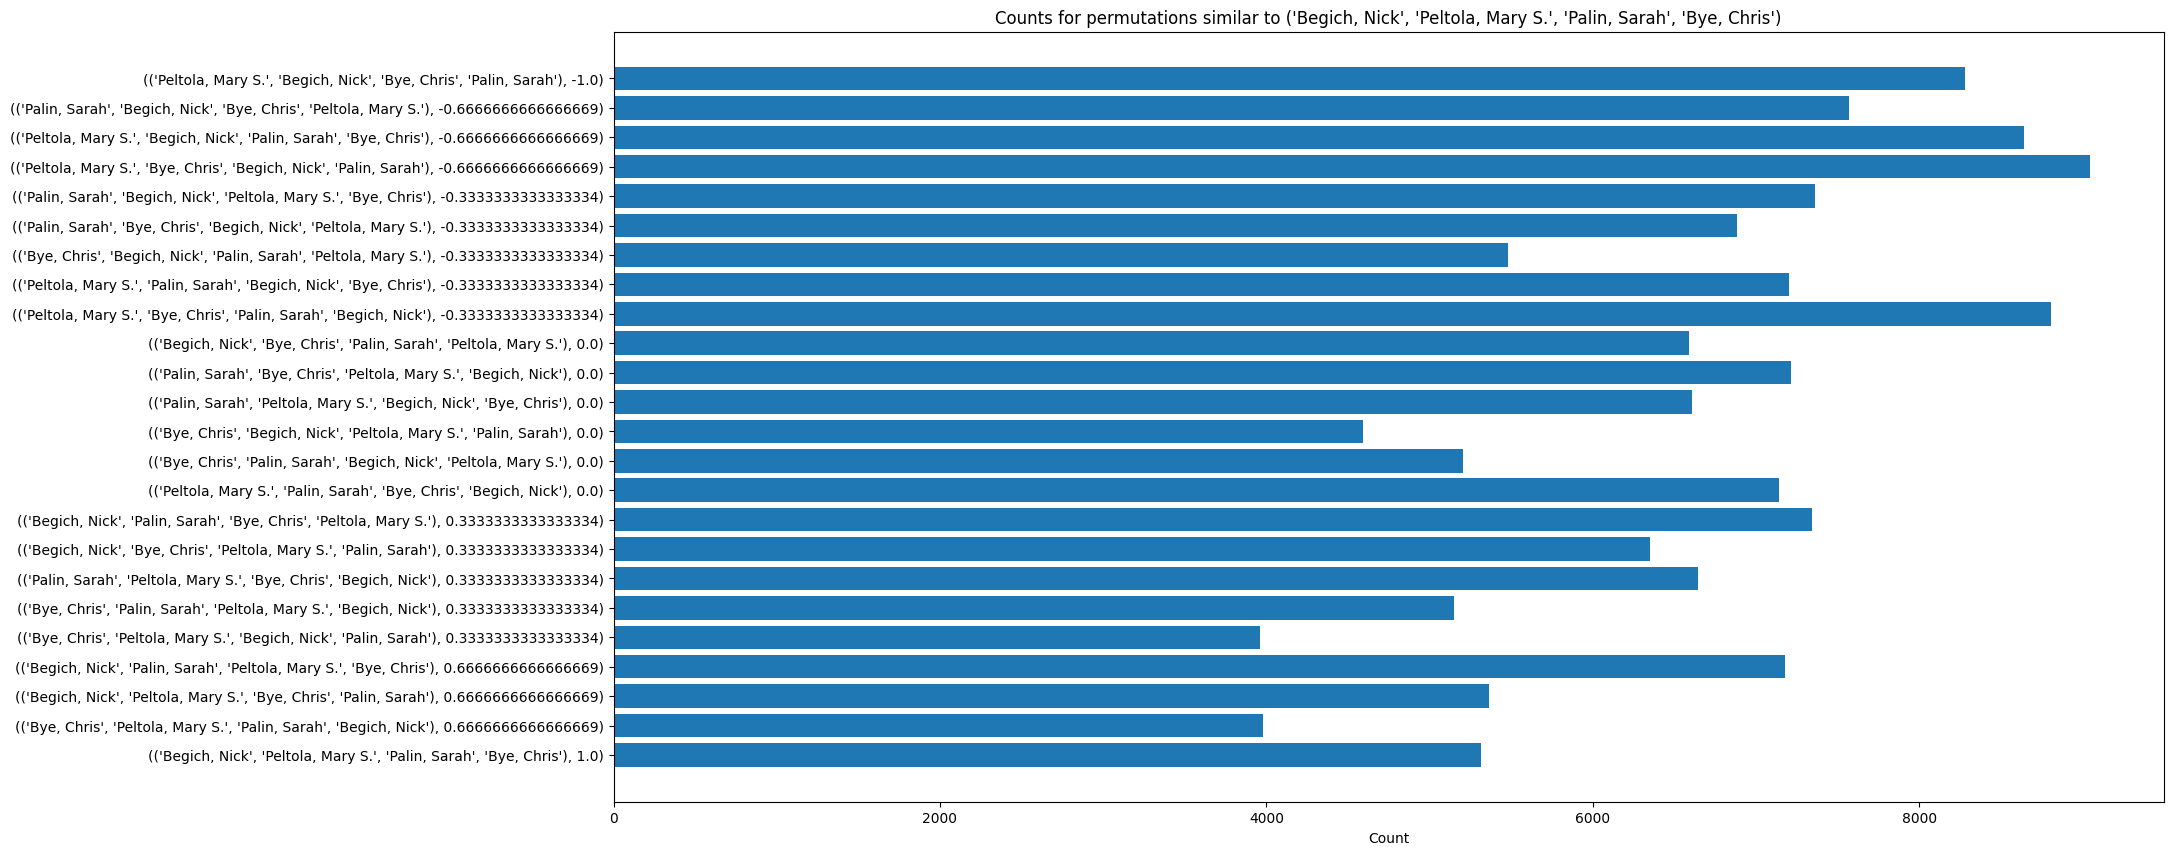

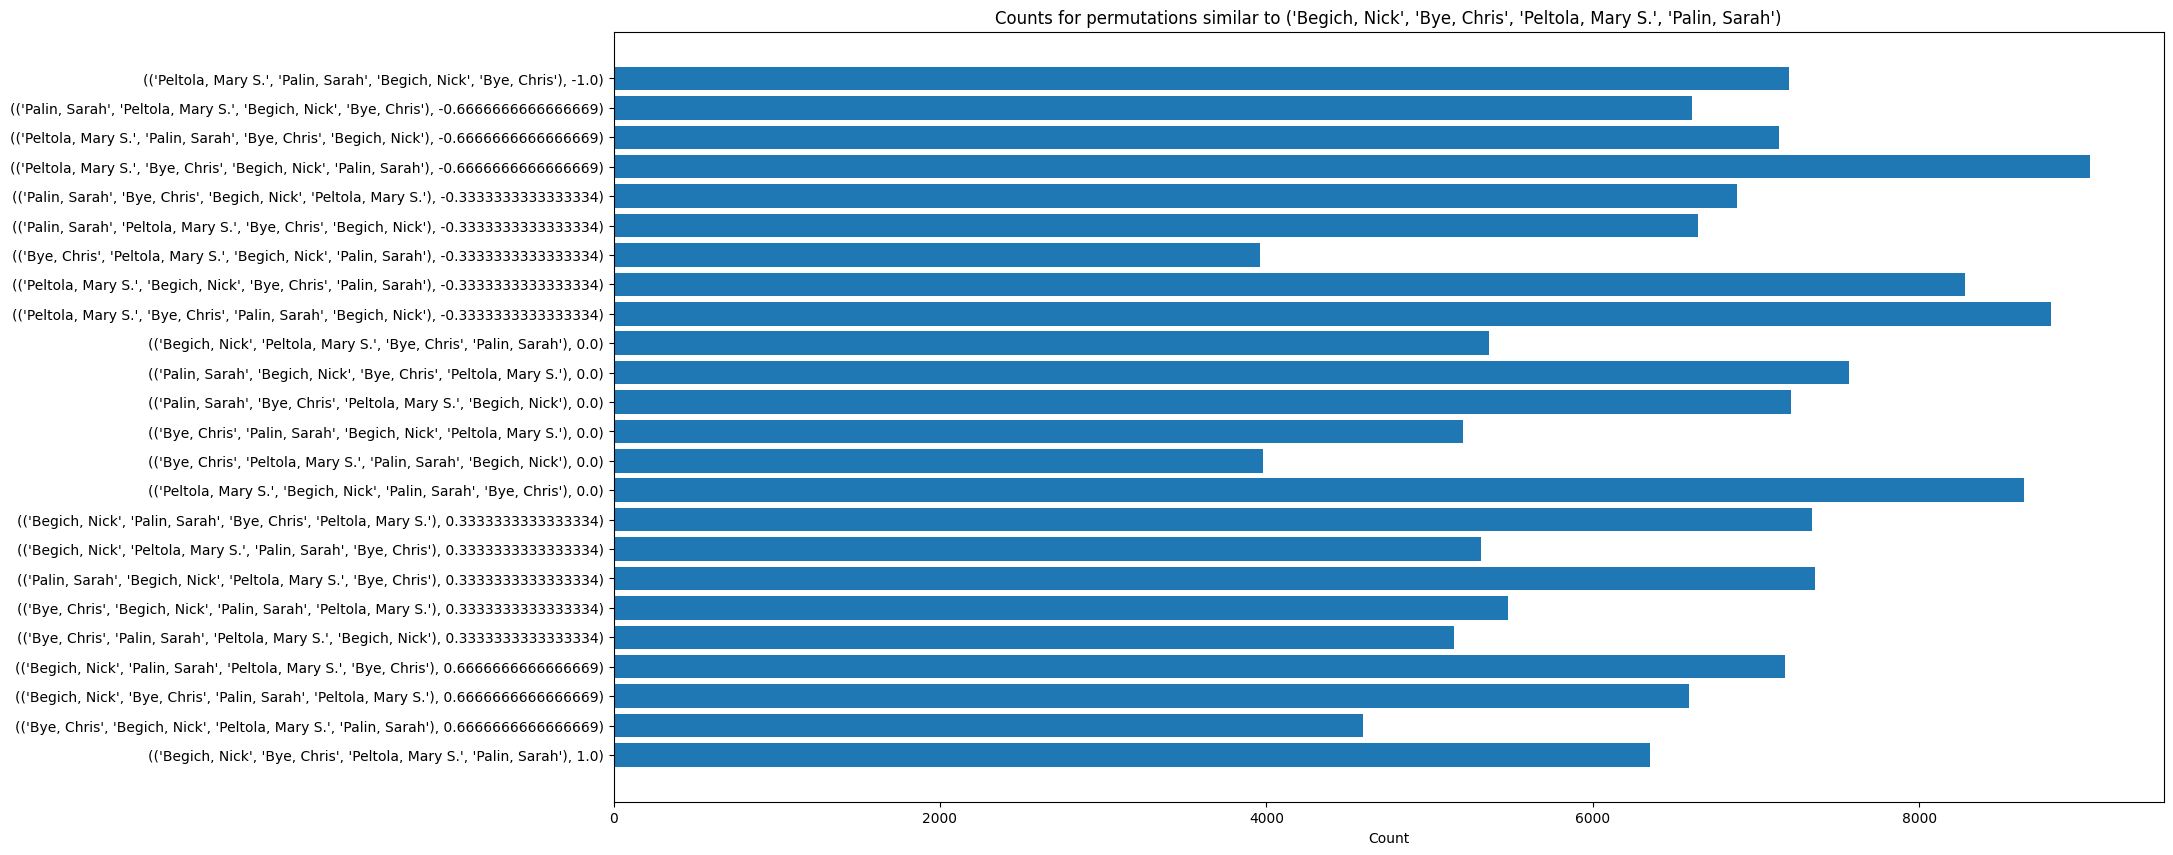

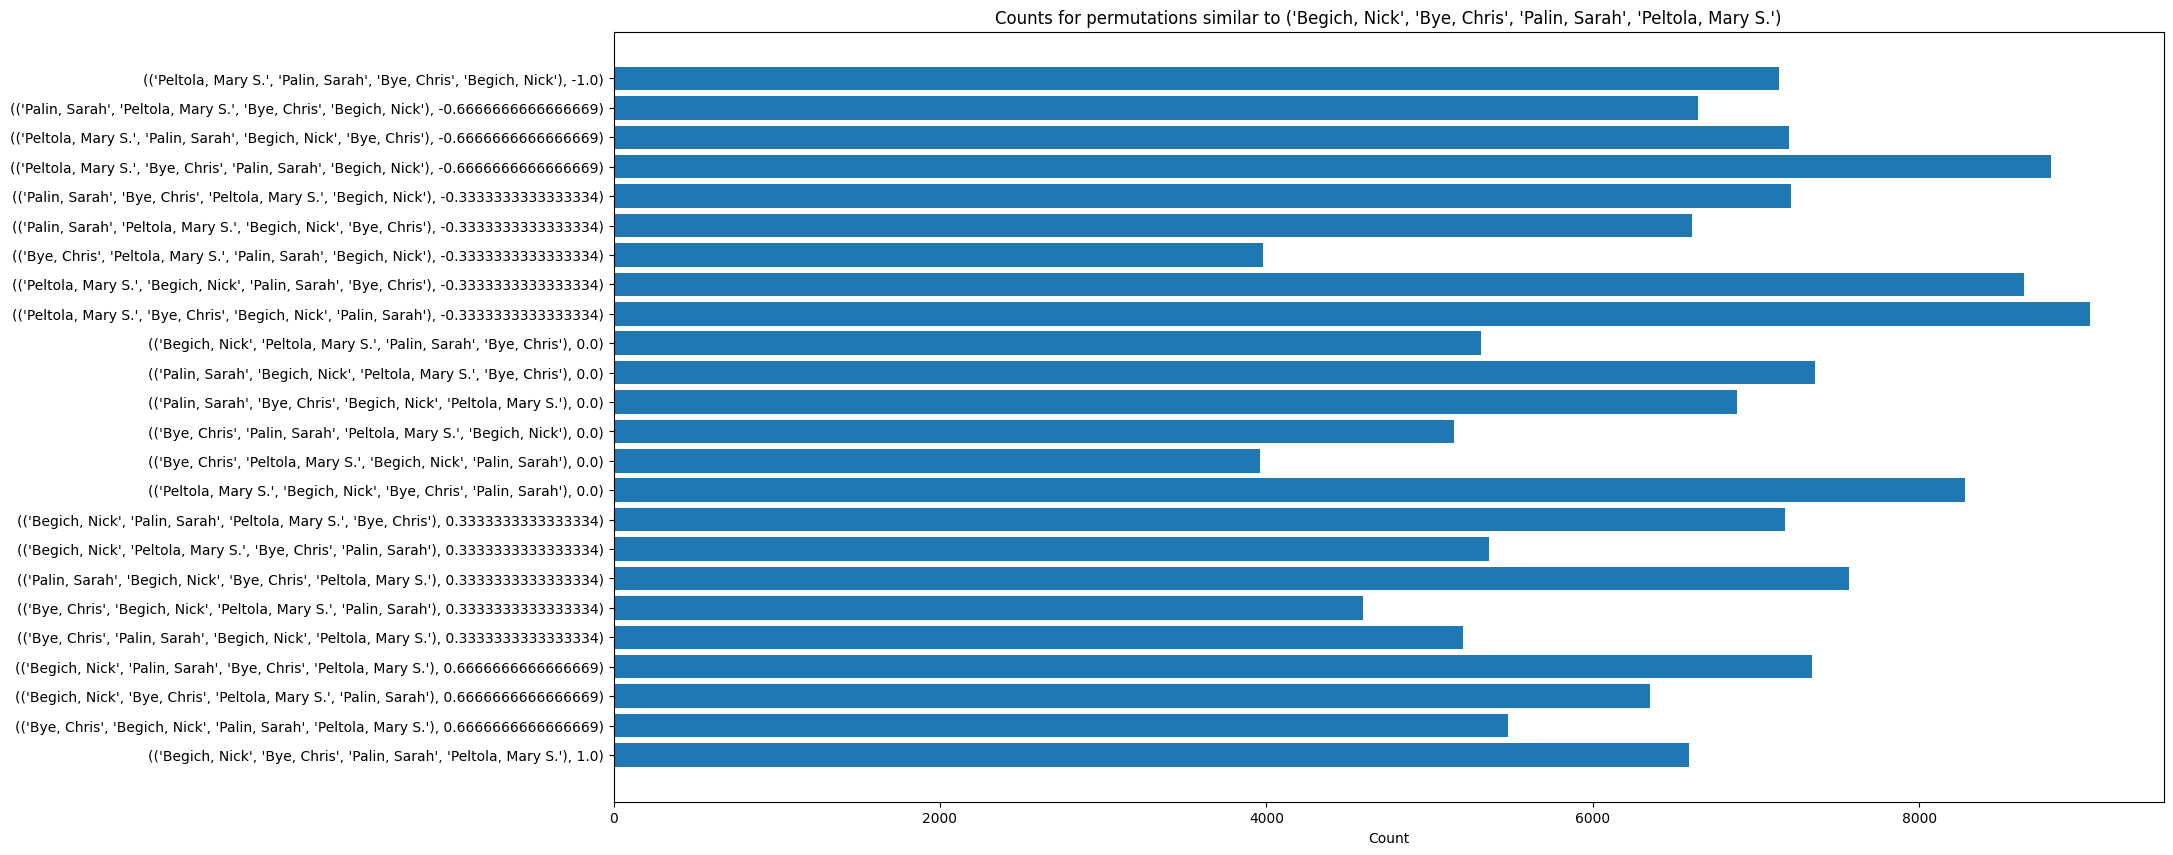

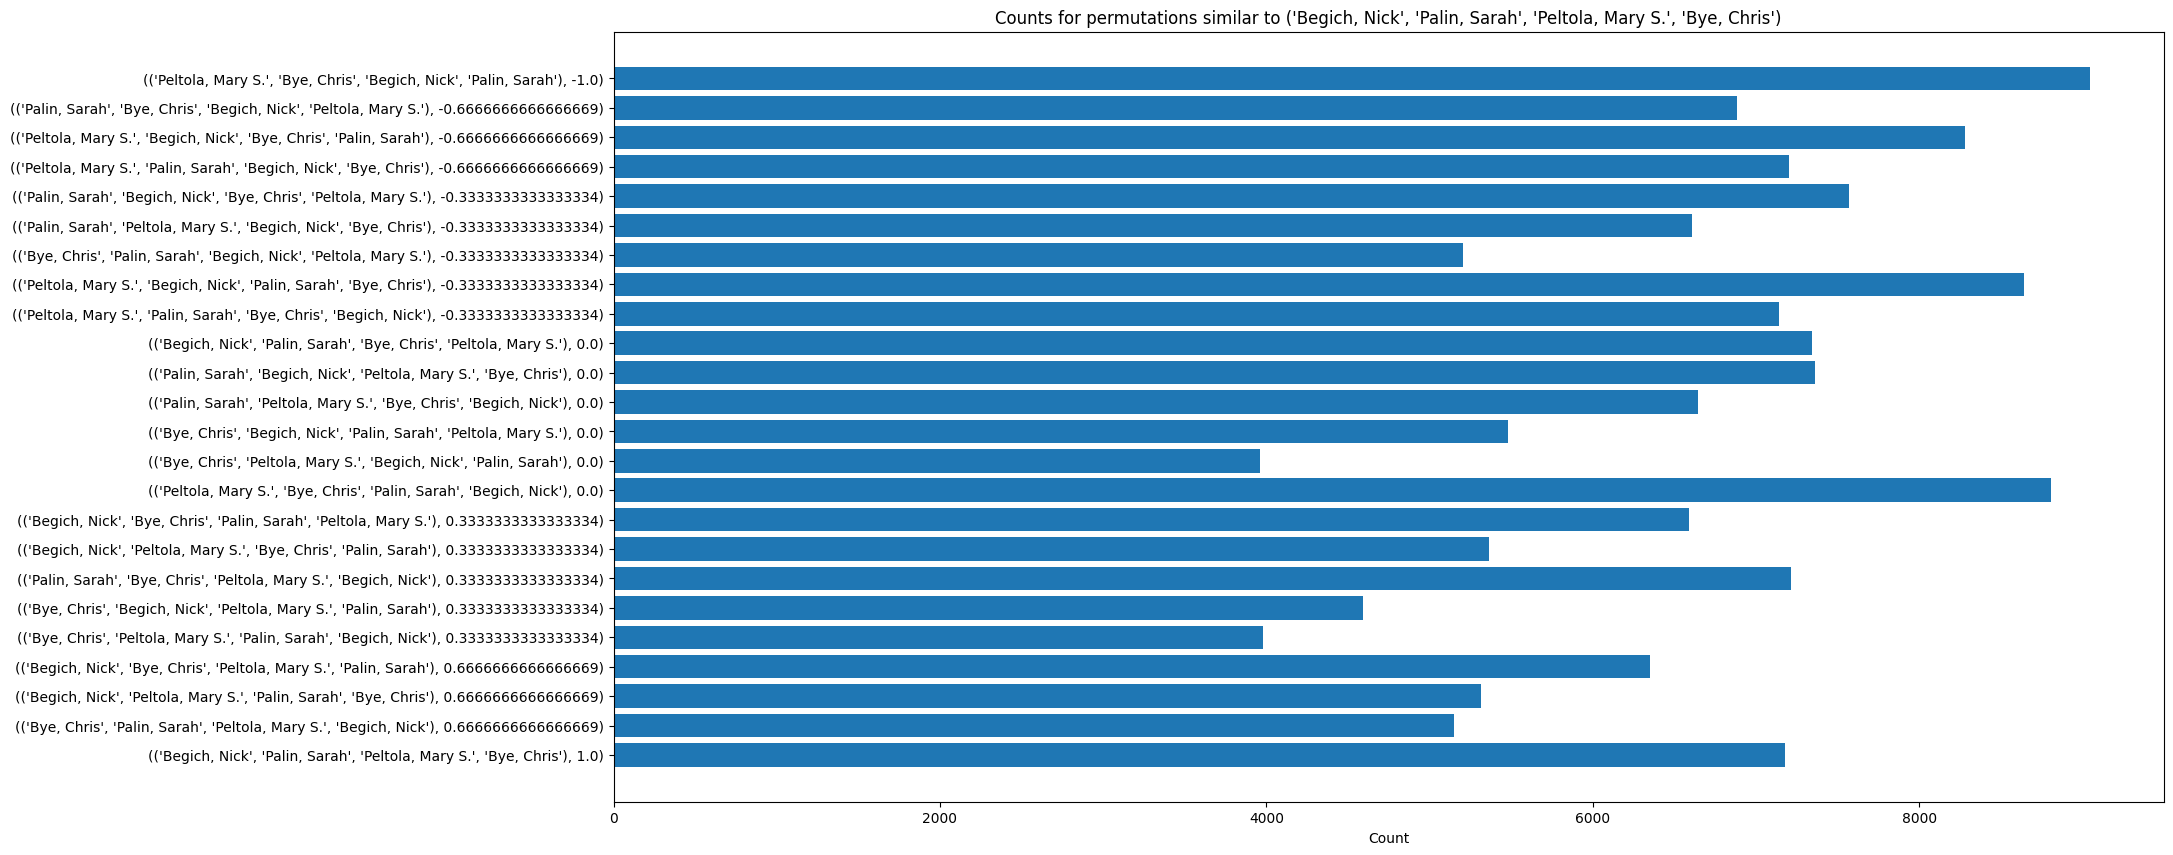

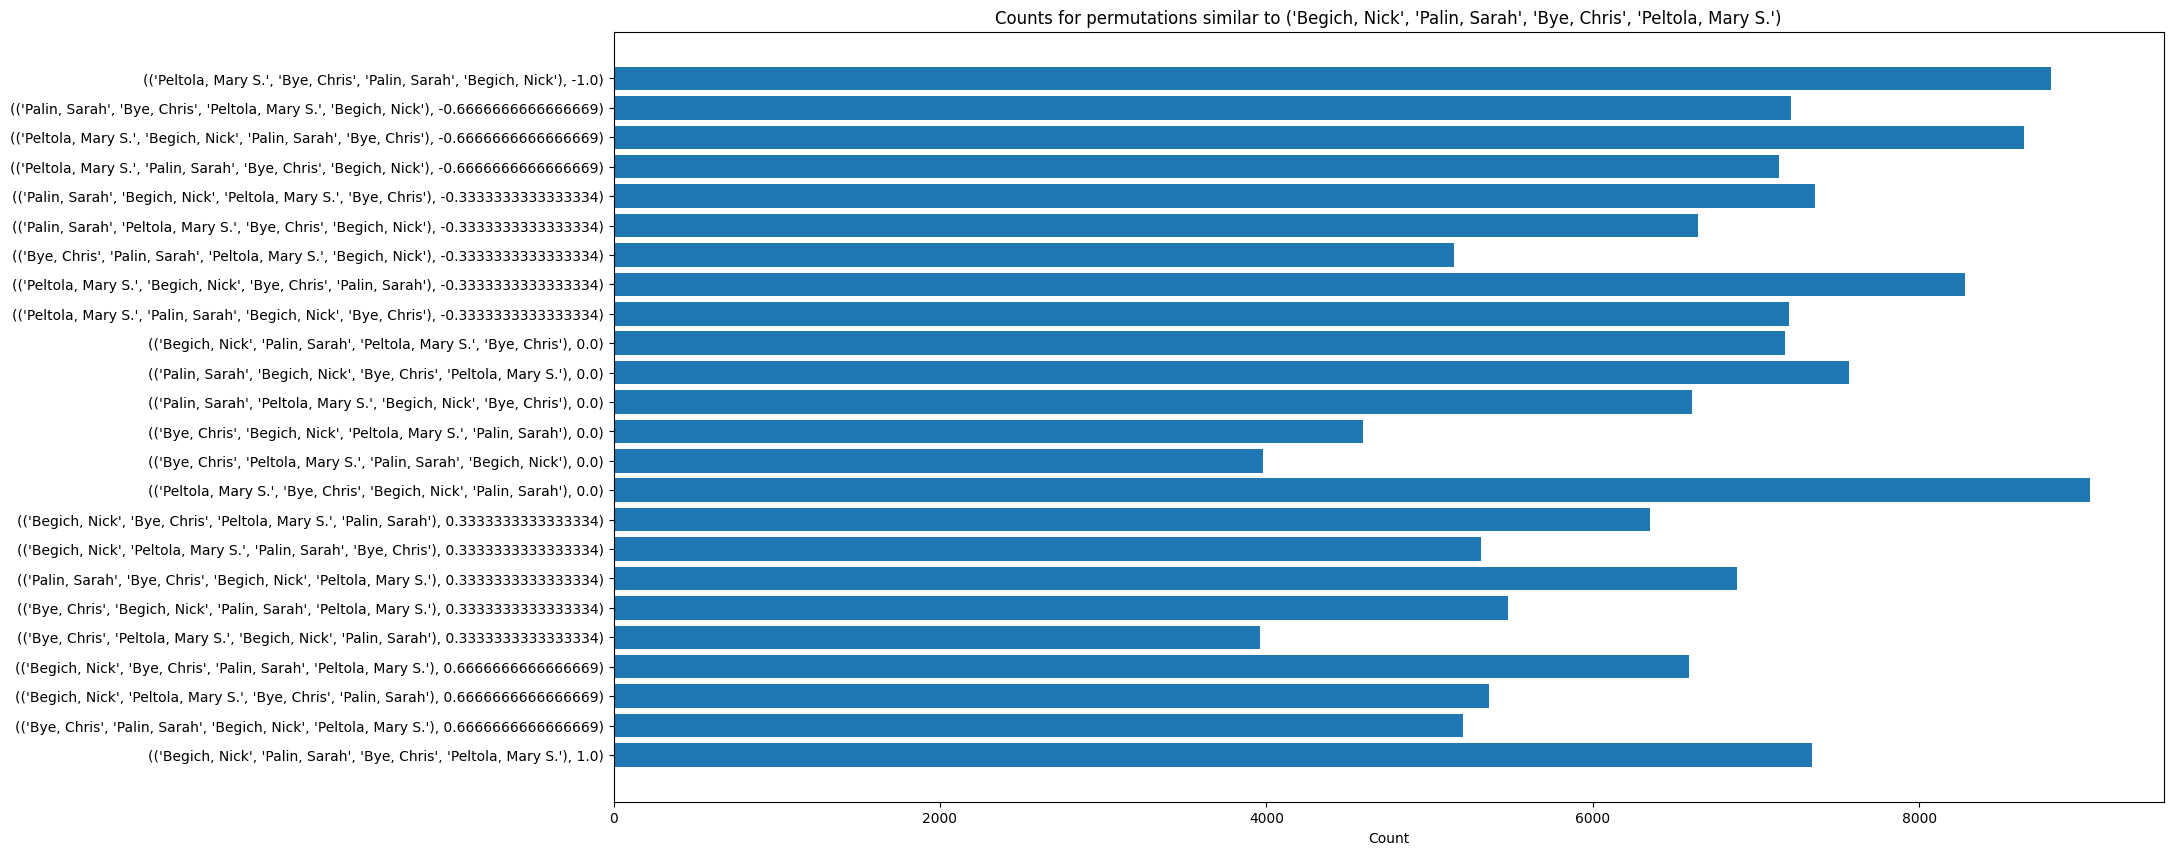

In [37]:
import itertools
import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Create individual bar plots for each permutation
for i, perm in enumerate(permutations):
    # Create a new figure for each permutation
    fig = plt.figure(figsize=(20, 10))

    # Get the Kendall Tau distances from the current permutation to all other permutations
    distances = dist_matrix[i]
    
    # Create an array of permutations, distances, and counts from permutation_counts, and sort it by distance
    perm_distances_counts = sorted([(p, d, permutation_counts[p]) for p, d in zip(permutations, distances)], key=lambda x: x[1], reverse=True)
    
    # Plot the counts in a horizontal bar plot
    plt.barh([str(f'{p, d}') for p, d, c in perm_distances_counts], [c for p, d, c in perm_distances_counts])
    plt.title(f'Counts for permutations similar to {perm}')
    plt.xlabel('Count')
    plt.show()
